# **Data Preprocessing**

## **Title:**
##        **ITSM Improvement through Machine Learning: Enhancing Incident Management at ABC Tech.**

## **PROBLEM** **OF** **STATEMENT:**

*   Predicting High Priority Tickets: To predict priority 1 & 2 tickets, so that they can take preventive measures or fix the problem before it surfaces.

*   Forecast the incident volume in different fields , quarterly and annual. So that they can be better prepared with resources and technology planning.

*    Auto tag the tickets with right priorities and right departments so that reassigning and related delay can be reduced.

*    Predict RFC (Request for change) and possible failure / misconfiguration of ITSM assets.









# **Description:**
## **Business Case Description:**

ABC Tech is an established mid-sized organization operating in the IT-enabled business sector for over a decade. They manage a significant volume of IT incidents and tickets, averaging between 22,000 to 25,000 per year. ABC Tech follows best practices in IT Service Management (ITSM), including incident management, problem management, change management, and configuration management processes. These ITIL practices have matured over time, reaching a high level of process maturity.

Recently, ABC Tech conducted an audit that indicated that further improvement initiatives in their ITSM processes may not provide a sufficient return on investment (ROI). Despite their mature processes, customer feedback from recent surveys has revealed that incident management, in particular, is rated poorly, suggesting there is room for enhancement.

In response to these challenges, ABC Tech's management has decided to explore the potential of machine learning (ML) to enhance their ITSM processes. After attending a Machine Learning conference focused on IT Service Management (ITSM), they identified four key areas where ML can contribute to improving ITSM processes within the organization:

1. **Predicting High Priority Tickets:** ABC Tech aims to develop an ML model that can predict high-priority tickets, specifically those categorized as priority 1 and 2. This prediction will allow them to take proactive measures to address issues or incidents before they escalate.

2. **Forecasting Incident Volume:** The organization plans to use ML to forecast the incident volume in different fields on a quarterly and annual basis. This predictive capability will help them better allocate resources and plan for the required technology upgrades.

3. **Auto-Tagging Tickets:** ABC Tech intends to implement a text classification ML model to automatically assign correct priorities and departments to incoming tickets. This automation will reduce reassignment and related delays in ticket handling.

4. **Predicting RFC and ITSM Asset Misconfigurations:** The organization aims to create predictive models for Request for Change (RFC) and detect potential failures or misconfigurations in ITSM assets. Identifying these issues in advance will help in preventing disruptions and improving overall ITSM asset management.

The dataset that ABC Tech plans to use for these ML initiatives comprises a total of approximately 46,000 records spanning the years 2012, 2013, and 2014. The data is stored in a MySQL database with read-only access, and the relevant connection details are provided.

Here's a summary of some key fields in the dataset:

- CI_Name: Configuration Item Name
- CI_Cat: Configuration Item Category
- CI_Subcat: Configuration Item Subcategory
- Incident_ID: Incident Identifier
- Status: Incident Status (e.g., Closed)
- Impact: Impact level
- Urgency: Urgency level
- Priority: Incident Priority
- Category: Incident Category
- KB_number: Knowledge Base Number
- Alert_Status: Alert Status
- No_of_Reassignments: Number of Reassignments
- Open_Time: Incident Open Time
- Reopen_Time: Incident Reopen Time
- Resolved_Time: Incident Resolved Time
- Close_Time: Incident Close Time
- Handle_Time_hrs: Time taken to handle the incident (in hours)
- Closure_Code: Code for incident closure
- No_of_Related_Interactions: Number of Related Interactions
- Related_Interaction: Identifier for Related Interaction
- No_of_Related_Incidents: Number of Related Incidents
- No_of_Related_Changes: Number of Related Changes
- Related_Change: Identifier for Related Change


## **Import Basic Libraries:**

In [877]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## **Load Data:**

In [878]:
data=pd.read_csv("Data\ITSM_data.csv")

In [879]:
data.head()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4.0,0.601292,...,NaN,4/11/2013 13:50,4/11/2013 13:51,"3,87,16,91,111",Other,1.0,SD0000007,2.0,NaN,NaN
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3.0,0.415050,...,2/12/2013 12:31,2/12/2013 12:36,2/12/2013 12:36,"4,35,47,86,389",Software,1.0,SD0000011,1.0,NaN,NaN
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NaN,0.517551,...,NaN,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1.0,SD0000017,NaN,NaN,NaN
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4.0,0.642927,...,NaN,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1.0,SD0000025,NaN,NaN,NaN
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4.0,0.345258,...,NaN,8/11/2013 13:55,8/11/2013 13:55,"3,38,39,03,333",Other,1.0,SD0000029,NaN,NaN,NaN


In [880]:
data.sample(20)

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
19188,SBA000462,application,Server Based Application,WBS000073,IM0019413,Closed,4,4,4.0,0.038055,...,NaN,6/12/2013 11:02,6/12/2013 11:02,"9,08",Software,1.0,SD0056632,NaN,NaN,NaN
29503,CBA000014,application,Client Based Application,WBS000073,IM0029785,Closed,4,4,4.0,0.317080,...,NaN,23-01-2014 15:32,23-01-2014 15:33,"2,47,24,16,667",Software,1.0,SD0090199,NaN,NaN,NaN
1925,SBA000607,application,Server Based Application,WBS000263,IM0002034,Closed,5,5,5.0,0.713904,...,NaN,2/10/2013 16:57,2/10/2013 16:58,"0,571111111",Other,1.0,SD0003689,NaN,NaN,NaN
21023,WBA000008,application,Web Based Application,WBS000167,IM0021256,Closed,5,5,5.0,0.386561,...,NaN,13-12-2013 14:16,13-12-2013 14:17,"10,495",Software,1.0,SD0062681,NaN,NaN,NaN
17439,SUB000424,subapplication,Web Based Application,WBS000073,IM0017655,Closed,4,4,4.0,0.626808,...,NaN,29-11-2013 10:53,29-11-2013 10:53,"8,49,58,33,333",Other,1.0,SD0050822,NaN,NaN,NaN
30763,SBA000263,application,Server Based Application,WBS000072,IM0031048,Closed,5,5,5.0,0.166426,...,NaN,27-01-2014 11:27,27-01-2014 11:27,"5,85,41,66,667",Other,1.0,SD0094116,NaN,NaN,NaN
25316,LAP000019,computer,Laptop,WBS000091,IM0025580,Closed,5,5,5.0,0.475846,...,NaN,6/1/2014 12:57,6/1/2014 12:57,"0,007777778",Hardware,1.0,SD0076388,NaN,NaN,NaN
19908,LAP000789,computer,Laptop,WBS000091,IM0020136,Closed,5,5,5.0,0.741272,...,11/12/2013 17:09,19-12-2013 11:51,19-12-2013 11:51,"7,53,38,61,111",Hardware,2.0,#MULTIVALUE,NaN,NaN,NaN
41090,WBA000103,application,Web Based Application,WBS000073,IM0041436,Closed,4,4,4.0,0.144159,...,NaN,6/3/2014 14:13,6/3/2014 14:14,"9,55,77,77,778",No error - works as designed,1.0,SD0127004,NaN,NaN,NaN
20957,SUB000424,subapplication,Web Based Application,WBS000073,IM0021190,Closed,4,4,4.0,0.713881,...,19-12-2013 11:07,19-12-2013 15:27,19-12-2013 15:28,"1,17,03,88,889",No error - works as designed,2.0,#MULTIVALUE,NaN,NaN,NaN


In [881]:
# info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CI_Name                     46606 non-null  object 
 1   CI_Cat                      46495 non-null  object 
 2   CI_Subcat                   46495 non-null  object 
 3   WBS                         46606 non-null  object 
 4   Incident_ID                 46606 non-null  object 
 5   Status                      46606 non-null  object 
 6   Impact                      46606 non-null  object 
 7   Urgency                     46606 non-null  object 
 8   Priority                    45226 non-null  float64
 9   number_cnt                  46606 non-null  float64
 10  Category                    46606 non-null  object 
 11  KB_number                   46606 non-null  object 
 12  Alert_Status                46606 non-null  object 
 13  No_of_Reassignments         466

# **Domain Analysis:**
Certainly! Domain analysis is an essential step in any data science or machine learning project. It involves gaining a deep understanding of the domain-specific aspects of the problem you're trying to solve. In this case, we're analyzing the domain of IT Service Management (ITSM) within the context of ABC Tech's business case. Here's a domain analysis for ITSM:

**1. IT Service Management (ITSM):**
   - **Definition:** IT Service Management (ITSM) refers to a set of practices and processes used by organizations to design, deliver, manage, and improve IT services for their customers and end-users.
   - **Importance:** ITSM ensures that IT services are aligned with business goals, reliable, and efficiently delivered, leading to enhanced customer satisfaction and business performance.

**2. Incident Management:**
   - **Definition:** Incident Management is a core ITSM process that involves identifying, categorizing, prioritizing, and resolving incidents to restore normal service operations as quickly as possible.
   - **Challenges:** Common challenges in incident management include handling a high volume of incidents, determining incident priorities, minimizing response times, and reducing the impact on end-users.

**3. Priority in ITSM:**
   - **Definition:** Priority is a classification system used to categorize incidents based on their severity and impact on business operations. In ITIL (IT Infrastructure Library) framework, there are typically four priority levels: Priority 1 (Critical), Priority 2 (High), Priority 3 (Medium), and Priority 4 (Low).
   - **Importance:** Prioritizing incidents helps organizations allocate resources effectively and respond to critical issues promptly.

**4. ITIL Framework:**
   - **Definition:** ITIL is a widely adopted framework for ITSM that provides best practices and guidelines for managing IT services, including incident management, problem management, change management, and configuration management.
   - **Maturity Levels:** ITIL processes can mature over time, starting from ad-hoc practices and progressing to well-defined, controlled, and optimized processes. A mature ITIL framework leads to improved service quality and efficiency.

**5. Machine Learning in ITSM:**
   - **Application:** Machine learning can be applied to ITSM processes to predict incidents, automate ticket classification, forecast resource needs, and detect anomalies or misconfigurations in IT assets.
   - **Benefits:** ML can enhance incident response, reduce manual workload, improve service quality, and proactively identify issues before they impact operations.

**6. Data Considerations:**
   - **Data Sources:** Data for ITSM projects typically come from various sources, including incident tracking systems, service logs, configuration databases, and customer feedback.
   - **Data Quality:** Data quality is critical, as inaccurate or incomplete data can lead to incorrect predictions and decisions.
   - **Privacy and Compliance:** ITSM data often contains sensitive information, so privacy and compliance with data protection regulations (e.g., GDPR) are crucial considerations.

**7. Metrics and KPIs:**
   - **Key Metrics:** Key Performance Indicators (KPIs) in ITSM include Mean Time to Resolve (MTTR), Incident Response Time, Incident Closure Rate, and Customer Satisfaction.
   - **Monitoring:** Continuous monitoring of KPIs helps organizations assess the effectiveness of their ITSM processes and make improvements.

**8. Stakeholders:**
   - **Internal Stakeholders:** IT teams, IT managers, incident responders, change management teams.
   - **External Stakeholders:** End-users, customers, auditors (for compliance).

**9. Challenges:**
   - **Scalability:** Handling a large volume of incidents efficiently can be challenging.
   - **Data Integration:** Integrating data from disparate sources can be complex.
   - **Change Management:** Implementing ML solutions may require organizational and cultural changes.


## **Basic Checks:**

In [882]:
data.head()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4.0,0.601292,...,NaN,4/11/2013 13:50,4/11/2013 13:51,"3,87,16,91,111",Other,1.0,SD0000007,2.0,NaN,NaN
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3.0,0.415050,...,2/12/2013 12:31,2/12/2013 12:36,2/12/2013 12:36,"4,35,47,86,389",Software,1.0,SD0000011,1.0,NaN,NaN
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NaN,0.517551,...,NaN,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1.0,SD0000017,NaN,NaN,NaN
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4.0,0.642927,...,NaN,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1.0,SD0000025,NaN,NaN,NaN
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4.0,0.345258,...,NaN,8/11/2013 13:55,8/11/2013 13:55,"3,38,39,03,333",Other,1.0,SD0000029,NaN,NaN,NaN


In [883]:
data.tail()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
46601,SBA000464,application,Server Based Application,WBS000073,IM0047053,Closed,4,4,4.0,0.231896,...,NaN,31-03-2014 16:29,31-03-2014 16:29,"0,095",Other,1.0,SD0147021,NaN,NaN,NaN
46602,SBA000461,application,Server Based Application,WBS000073,IM0047054,Closed,4,4,4.0,0.805153,...,NaN,31-03-2014 15:29,31-03-2014 15:29,"0,428333333",User error,1.0,SD0146967,NaN,NaN,NaN
46603,LAP000019,computer,Laptop,WBS000091,IM0047055,Closed,5,5,5.0,0.917466,...,NaN,31-03-2014 15:32,31-03-2014 15:32,"0,071666667",Hardware,1.0,SD0146982,NaN,NaN,NaN
46604,WBA000058,application,Web Based Application,WBS000073,IM0047056,Closed,4,4,4.0,0.701278,...,NaN,31-03-2014 15:42,31-03-2014 15:42,"0,116944444",Software,1.0,SD0146986,NaN,NaN,NaN
46605,DCE000077,hardware,DataCenterEquipment,WBS000267,IM0047057,Closed,3,3,3.0,0.902320,...,NaN,31-03-2014 22:47,31-03-2014 22:47,"0,586388889",Hardware,1.0,SD0147088,NaN,NaN,NaN


In [884]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CI_Name                     46606 non-null  object 
 1   CI_Cat                      46495 non-null  object 
 2   CI_Subcat                   46495 non-null  object 
 3   WBS                         46606 non-null  object 
 4   Incident_ID                 46606 non-null  object 
 5   Status                      46606 non-null  object 
 6   Impact                      46606 non-null  object 
 7   Urgency                     46606 non-null  object 
 8   Priority                    45226 non-null  float64
 9   number_cnt                  46606 non-null  float64
 10  Category                    46606 non-null  object 
 11  KB_number                   46606 non-null  object 
 12  Alert_Status                46606 non-null  object 
 13  No_of_Reassignments         466

In [885]:
data.dtypes

CI_Name                        object
CI_Cat                         object
CI_Subcat                      object
WBS                            object
Incident_ID                    object
Status                         object
Impact                         object
Urgency                        object
Priority                      float64
number_cnt                    float64
Category                       object
KB_number                      object
Alert_Status                   object
No_of_Reassignments           float64
Open_Time                      object
Reopen_Time                    object
Resolved_Time                  object
Close_Time                     object
Handle_Time_hrs                object
Closure_Code                   object
No_of_Related_Interactions    float64
Related_Interaction            object
No_of_Related_Incidents       float64
No_of_Related_Changes         float64
Related_Change                 object
dtype: object

In [886]:
data.columns

Index(['CI_Name', 'CI_Cat', 'CI_Subcat', 'WBS', 'Incident_ID', 'Status',
       'Impact', 'Urgency', 'Priority', 'number_cnt', 'Category', 'KB_number',
       'Alert_Status', 'No_of_Reassignments', 'Open_Time', 'Reopen_Time',
       'Resolved_Time', 'Close_Time', 'Handle_Time_hrs', 'Closure_Code',
       'No_of_Related_Interactions', 'Related_Interaction',
       'No_of_Related_Incidents', 'No_of_Related_Changes', 'Related_Change'],
      dtype='object')

In [887]:
data.drop(["CI_Name", "KB_number", "Related_Interaction","Related_Change"], axis=1, inplace=True)

In [888]:
data.columns

Index(['CI_Cat', 'CI_Subcat', 'WBS', 'Incident_ID', 'Status', 'Impact',
       'Urgency', 'Priority', 'number_cnt', 'Category', 'Alert_Status',
       'No_of_Reassignments', 'Open_Time', 'Reopen_Time', 'Resolved_Time',
       'Close_Time', 'Handle_Time_hrs', 'Closure_Code',
       'No_of_Related_Interactions', 'No_of_Related_Incidents',
       'No_of_Related_Changes'],
      dtype='object')

In [889]:
cat_data=data.select_dtypes(include=["O"]).columns
cat_data


Index(['CI_Cat', 'CI_Subcat', 'WBS', 'Incident_ID', 'Status', 'Impact',
       'Urgency', 'Category', 'Alert_Status', 'Open_Time', 'Reopen_Time',
       'Resolved_Time', 'Close_Time', 'Handle_Time_hrs', 'Closure_Code'],
      dtype='object')

In [890]:
for i in cat_data:
  print(i,data[i].unique())
  print(data[i].value_counts())
  print("----------------------------")
  
  

CI_Cat ['subapplication' 'application' 'computer' nan 'displaydevice' 'software'
 'storage' 'database' 'hardware' 'officeelectronics' 'networkcomponents'
 'applicationcomponent' 'Phone']
CI_Cat
application             32900
subapplication           7782
computer                 3643
storage                   703
hardware                  442
software                  333
database                  214
displaydevice             212
officeelectronics         152
networkcomponents         107
applicationcomponent        5
Phone                       2
Name: count, dtype: int64
----------------------------
CI_Subcat ['Web Based Application' 'Desktop Application' 'Server Based Application'
 'SAP' 'Client Based Application' 'Citrix' 'Standard Application'
 'Windows Server' 'Laptop' 'Linux Server' nan 'Monitor'
 'Automation Software' 'SAN' 'Banking Device' 'Desktop' 'Database'
 'Oracle Server' 'Keyboard' 'Printer' 'Exchange' 'System Software' 'VDI'
 'Encryption' 'Omgeving' 'MigratieDummy' 'Sca

In [891]:
num_data=data.select_dtypes(include=["float64","int64"]).columns
num_data

Index(['Priority', 'number_cnt', 'No_of_Reassignments',
       'No_of_Related_Interactions', 'No_of_Related_Incidents',
       'No_of_Related_Changes'],
      dtype='object')

In [892]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Priority,45226.0,4.215805,0.705624,1.000000,4.000000,4.000000,5.000000,5.000000
number_cnt,46606.0,0.499658,0.288634,0.000023,0.248213,0.500269,0.749094,0.999997
No_of_Reassignments,46605.0,1.131831,2.269774,0.000000,0.000000,0.000000,2.000000,46.000000
No_of_Related_Interactions,46492.0,1.149897,2.556338,1.000000,1.000000,1.000000,1.000000,370.000000
No_of_Related_Incidents,1222.0,1.669394,3.339687,1.000000,1.000000,1.000000,1.000000,63.000000
No_of_Related_Changes,560.0,1.058929,0.403596,1.000000,1.000000,1.000000,1.000000,9.000000


In [893]:
data.describe(include="object")

,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Category,Alert_Status,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code
count,46495,46495,46606,46606,46606,46606,46606,46606,46606,46606,2284,44826,46606,46605,46146
unique,12,64,274,46606,2,6,11,4,1,34636,2244,33627,34528,30638,14
top,application,Server Based Application,WBS000073,IM0000004,Closed,4,4,incident,closed,24-03-2014 08:54,29-10-2013 15:03,10/10/2013 12:53,2/10/2013 15:20,0,Other
freq,32900,18811,13342,1,46597,22556,15526,37748,46606,7,2,7,21,236,16470


* Unique value will be 1 for constant column.Here, Alert_Status is the constant feature. so we drop the column.

In [894]:
data.sample()

,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,...,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
12532,application,Web Based Application,WBS000073,IM0012719,Closed,4,4,4.0,0.652326,incident,...,0.0,12/11/2013 9:23,NaN,12/11/2013 9:36,12/11/2013 9:36,"0,210833333",Software,1.0,NaN,NaN


In [895]:
data.drop(["Alert_Status"],axis=1,inplace=True)

## **Basic Checks Report:**
### **Overview:**
When working with IT Service Management (ITSM) data or any dataset, it's essential to perform basic data checks to ensure the quality and integrity of the data. These basic checks help identify issues early on and ensure that your analysis or project is based on reliable data.

**Data Shape**: We Check the dimensions of the dataset, i.e., the number of rows and columns, using data.shape. Data Contains 46606 Rows and 25 columns.
**Data Types:** We Verified that the data types of each column are as expected usingdata.dtypes.Priority,number_cnt,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes,No_of_Reassignments are in float64 and remaining columns are in object.

**Descriptive Statistics:** We Used data.describe().T to get summary statistics (mean, min, max, etc.) for numerical columns.
Use data.describe(include='O').T for a summary of categorical columns.

**Unique Values:** Checked the number of unique values in categorical columns using data['column'].unique(). here, One constant columns are there. so we dropped that column.

**Value Counts:** Examined the distribution of categorical values using df['column'].value_counts().

The goal is to ensure that our data is clean, complete, and suitable for analysis or further processing.

# **Data Preprocessing**


In [896]:
data.columns

Index(['CI_Cat', 'CI_Subcat', 'WBS', 'Incident_ID', 'Status', 'Impact',
       'Urgency', 'Priority', 'number_cnt', 'Category', 'No_of_Reassignments',
       'Open_Time', 'Reopen_Time', 'Resolved_Time', 'Close_Time',
       'Handle_Time_hrs', 'Closure_Code', 'No_of_Related_Interactions',
       'No_of_Related_Incidents', 'No_of_Related_Changes'],
      dtype='object')

In [897]:
data.dtypes

CI_Cat                         object
CI_Subcat                      object
WBS                            object
Incident_ID                    object
Status                         object
Impact                         object
Urgency                        object
Priority                      float64
number_cnt                    float64
Category                       object
No_of_Reassignments           float64
Open_Time                      object
Reopen_Time                    object
Resolved_Time                  object
Close_Time                     object
Handle_Time_hrs                object
Closure_Code                   object
No_of_Related_Interactions    float64
No_of_Related_Incidents       float64
No_of_Related_Changes         float64
dtype: object

In [898]:
data.duplicated().sum()

0

In [899]:
data.isnull().sum()

CI_Cat                          111
CI_Subcat                       111
WBS                               0
Incident_ID                       0
Status                            0
Impact                            0
Urgency                           0
Priority                       1380
number_cnt                        0
Category                          0
No_of_Reassignments               1
Open_Time                         0
Reopen_Time                   44322
Resolved_Time                  1780
Close_Time                        0
Handle_Time_hrs                   1
Closure_Code                    460
No_of_Related_Interactions      114
No_of_Related_Incidents       45384
No_of_Related_Changes         46046
dtype: int64

## **Replacing Null Values**

### **Replacing Null Values for CI_Cat**

In [900]:
data[data["CI_Cat"].isnull()]["CI_Cat"]

316      NaN
538      NaN
593      NaN
670      NaN
1128     NaN
        ... 
34462    NaN
34868    NaN
36150    NaN
38262    NaN
38429    NaN
Name: CI_Cat, Length: 111, dtype: object

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'subapplication'),
  Text(1, 0, 'application'),
  Text(2, 0, 'computer'),
  Text(3, 0, 'displaydevice'),
  Text(4, 0, 'software'),
  Text(5, 0, 'storage'),
  Text(6, 0, 'database'),
  Text(7, 0, 'hardware'),
  Text(8, 0, 'officeelectronics'),
  Text(9, 0, 'networkcomponents'),
  Text(10, 0, 'applicationcomponent'),
  Text(11, 0, 'Phone')])

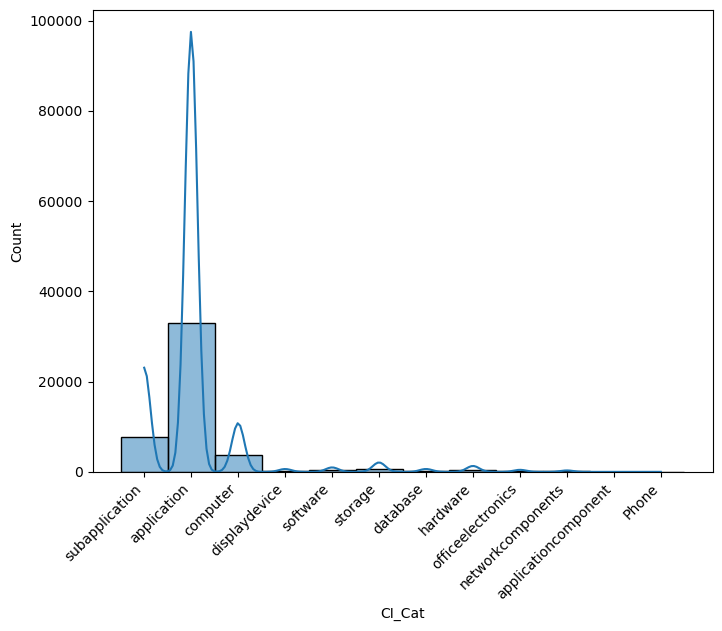

In [901]:
plt.figure(figsize=(8,6))
sns.histplot(data=data, x=data['CI_Cat'], kde=True)
#sns.histplot(data=data, x=data["CI_Cat"],order=data["CI_Cat"].value_counts().index,kde=true)
plt.xticks(rotation=45,ha="right")

* The majority of the data is between 0 and 600.
* There are a few outliers at the high end.
* The median is slightly higher than the mode, which suggests that the data is somewhat skewed to the right.

In [902]:
data["CI_Cat"].mode()

0    application
Name: CI_Cat, dtype: object

In [903]:
data.CI_Cat.unique()
data.CI_Cat.value_counts()

CI_Cat
application             32900
subapplication           7782
computer                 3643
storage                   703
hardware                  442
software                  333
database                  214
displaydevice             212
officeelectronics         152
networkcomponents         107
applicationcomponent        5
Phone                       2
Name: count, dtype: int64

In [904]:
data.loc[data["CI_Cat"].isnull()==True,"CI_Cat"]="application"

In [905]:
data.isnull().sum()

CI_Cat                            0
CI_Subcat                       111
WBS                               0
Incident_ID                       0
Status                            0
Impact                            0
Urgency                           0
Priority                       1380
number_cnt                        0
Category                          0
No_of_Reassignments               1
Open_Time                         0
Reopen_Time                   44322
Resolved_Time                  1780
Close_Time                        0
Handle_Time_hrs                   1
Closure_Code                    460
No_of_Related_Interactions      114
No_of_Related_Incidents       45384
No_of_Related_Changes         46046
dtype: int64

### **Replacing Null Values for CI_Subcat**

In [906]:
data[data["CI_Subcat"].isnull()]["CI_Subcat"]

316      NaN
538      NaN
593      NaN
670      NaN
1128     NaN
        ... 
34462    NaN
34868    NaN
36150    NaN
38262    NaN
38429    NaN
Name: CI_Subcat, Length: 111, dtype: object

<Axes: xlabel='CI_Subcat', ylabel='Count'>

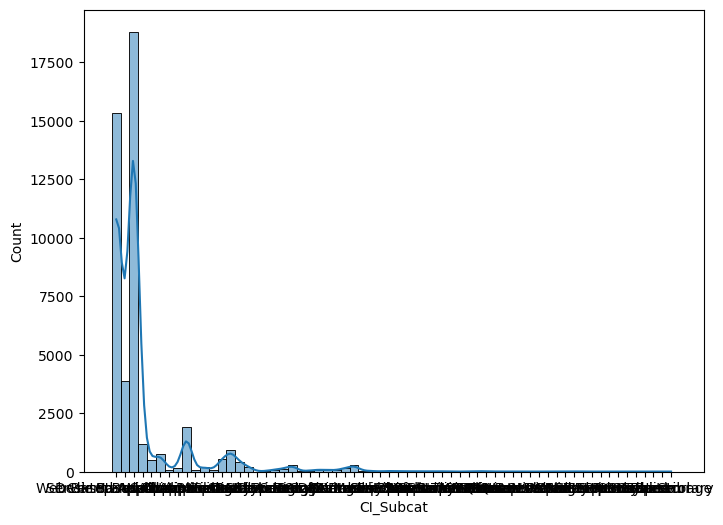

In [907]:


plt.figure(figsize=(8,6))
sns.histplot(data=data, x=data['CI_Subcat'], kde=True)

* The distribution of the CI_Subcat column is skewed to the right.
* There is a small number of outliers at the high end, representing CI_Subcat values of In Progress and Not Started.

In [908]:
data["CI_Subcat"].mode()

0    Server Based Application
Name: CI_Subcat, dtype: object

In [909]:
data.CI_Subcat.unique()
data.CI_Subcat.value_counts()

CI_Subcat
Server Based Application    18811
Web Based Application       15311
Desktop Application          3876
Laptop                       1921
SAP                          1199
                            ...  
VMWare                          1
Application Server              1
NonStop Storage                 1
Protocol                        1
Security Software               1
Name: count, Length: 64, dtype: int64

In [910]:
data.loc[data["CI_Subcat"].isnull()==True,"CI_Subcat"]="Server Based Application"

In [911]:
data.isnull().sum()

CI_Cat                            0
CI_Subcat                         0
WBS                               0
Incident_ID                       0
Status                            0
Impact                            0
Urgency                           0
Priority                       1380
number_cnt                        0
Category                          0
No_of_Reassignments               1
Open_Time                         0
Reopen_Time                   44322
Resolved_Time                  1780
Close_Time                        0
Handle_Time_hrs                   1
Closure_Code                    460
No_of_Related_Interactions      114
No_of_Related_Incidents       45384
No_of_Related_Changes         46046
dtype: int64

### **Replacing Null Values for Priority**





In [912]:
data[data["Priority"].isnull()]["Priority"]

2       NaN
8       NaN
103     NaN
147     NaN
152     NaN
         ..
46424   NaN
46446   NaN
46484   NaN
46553   NaN
46590   NaN
Name: Priority, Length: 1380, dtype: float64

<Axes: xlabel='Priority', ylabel='Count'>

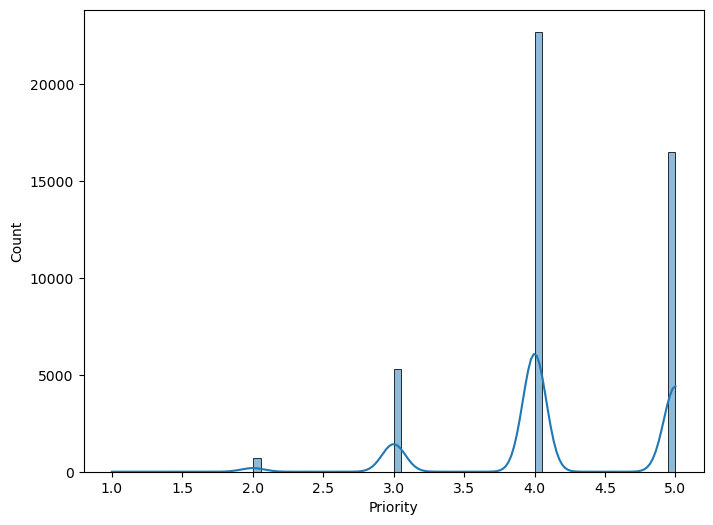

In [913]:
plt.figure(figsize=(8,6))
sns.histplot(data=data, x=data['Priority'], kde=True)

* The distribution of the data is skewed to the right, with most values between 20 and 50.
* There are a few outliers at the high end, with values above 100.

In [914]:
data["Priority"].median()

4.0

In [915]:
data["Priority"].mode()

0    4.0
Name: Priority, dtype: float64

In [916]:
data.loc[data["Priority"].isnull()==True,"Priority"]=4.0

In [917]:
data.isnull().sum()

CI_Cat                            0
CI_Subcat                         0
WBS                               0
Incident_ID                       0
Status                            0
Impact                            0
Urgency                           0
Priority                          0
number_cnt                        0
Category                          0
No_of_Reassignments               1
Open_Time                         0
Reopen_Time                   44322
Resolved_Time                  1780
Close_Time                        0
Handle_Time_hrs                   1
Closure_Code                    460
No_of_Related_Interactions      114
No_of_Related_Incidents       45384
No_of_Related_Changes         46046
dtype: int64

In [918]:
data.sample(10)

,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
16300,application,Server Based Application,WBS000219,IM0016514,Closed,5,5,5.0,0.813696,request for information,0.0,25-11-2013 12:28,NaN,26-11-2013 15:23,26-11-2013 15:23,"1,34,05,55,556",Unknown,1.0,1.0,NaN
39592,application,Web Based Application,WBS000073,IM0039924,Closed,4,4,4.0,0.788829,incident,0.0,26-02-2014 15:52,NaN,27-02-2014 15:02,27-02-2014 15:02,"9,67,52,77,778",Other,1.0,NaN,NaN
3985,application,Web Based Application,WBS000073,IM0004109,Closed,4,4,4.0,0.894944,incident,0.0,9/10/2013 14:27,NaN,10/10/2013 13:34,10/10/2013 13:34,"96,075",Unknown,1.0,NaN,NaN
5717,application,Web Based Application,WBS000073,IM0005859,Closed,4,4,4.0,0.015419,incident,0.0,16-10-2013 09:48,NaN,16-10-2013 10:59,16-10-2013 10:59,"1,19,38,88,889",Software,1.0,NaN,NaN
32905,subapplication,Server Based Application,WBS000095,IM0033202,Closed,5,5,5.0,0.689155,request for information,2.0,3/2/2014 9:12,3/2/2014 10:12,10/2/2014 14:39,10/2/2014 14:39,"7,48,22,22,222",User error,2.0,NaN,NaN
2871,application,Server Based Application,WBS000073,IM0002988,Closed,5,5,5.0,0.903658,incident,0.0,7/10/2013 8:50,NaN,7/10/2013 14:12,7/10/2013 14:12,"5,36,08,33,333",Software,1.0,NaN,NaN
40119,application,Server Based Application,WBS000073,IM0040454,Closed,4,4,4.0,0.532620,incident,0.0,28-02-2014 10:06,NaN,28-02-2014 10:56,28-02-2014 10:56,"0,833055556",Software,1.0,NaN,NaN
16473,application,Web Based Application,WBS000073,IM0016687,Closed,4,4,4.0,0.152102,incident,0.0,25-11-2013 16:30,NaN,25-11-2013 18:45,25-11-2013 18:45,"0,523333333",Software,1.0,NaN,NaN
36647,application,Desktop Application,WBS000330,IM0036959,Closed,5,5,5.0,0.538615,incident,0.0,14-02-2014 14:59,NaN,21-02-2014 13:19,21-02-2014 13:19,"5,08,39,72,222",Hardware,1.0,NaN,NaN
29903,application,Desktop Application,WBS000094,IM0030187,Closed,5,5,5.0,0.010968,incident,0.0,22-01-2014 10:39,NaN,22-01-2014 13:50,22-01-2014 13:50,"3,18,13,88,889",No error - works as designed,1.0,NaN,NaN


### **Remove the row with the null value for No_of_Reassignments**

In [919]:
# Remove the row with the null value in the 'No_of_Reassignments' column
data = data.dropna(subset=['No_of_Reassignments'])

In [920]:
data.isnull().sum()

CI_Cat                            0
CI_Subcat                         0
WBS                               0
Incident_ID                       0
Status                            0
Impact                            0
Urgency                           0
Priority                          0
number_cnt                        0
Category                          0
No_of_Reassignments               0
Open_Time                         0
Reopen_Time                   44321
Resolved_Time                  1780
Close_Time                        0
Handle_Time_hrs                   0
Closure_Code                    460
No_of_Related_Interactions      114
No_of_Related_Incidents       45383
No_of_Related_Changes         46045
dtype: int64

### **Replacing Null Values for Closure_Code**

In [921]:
data[data["Closure_Code"].isnull()]["Closure_Code"]

9275     NaN
9488     NaN
9698     NaN
9989     NaN
10045    NaN
        ... 
46077    NaN
46247    NaN
46291    NaN
46357    NaN
46413    NaN
Name: Closure_Code, Length: 460, dtype: object

<Axes: xlabel='Closure_Code', ylabel='Count'>

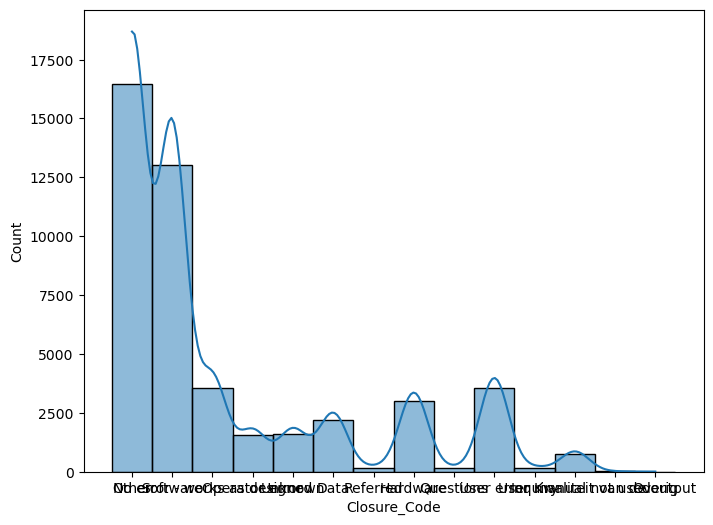

In [922]:
plt.figure(figsize=(8,6))
sns.histplot(data=data, x=data['Closure_Code'], kde=True)

In [923]:
data["Closure_Code"].mode()

0    Other
Name: Closure_Code, dtype: object

In [924]:
data.Closure_Code.unique()
data.Closure_Code.value_counts()

Closure_Code
Other                           16470
Software                        13026
User error                       3554
No error - works as designed     3530
Hardware                         2999
Data                             2209
Unknown                          1590
Operator error                   1539
User manual not used              765
Inquiry                           162
Referred                          158
Questions                         132
Kwaliteit van de output            10
Overig                              1
Name: count, dtype: int64

In [925]:
data.loc[data["Closure_Code"].isnull()==True,"Closure_Code"]="other"

In [926]:
data.isnull().sum()

CI_Cat                            0
CI_Subcat                         0
WBS                               0
Incident_ID                       0
Status                            0
Impact                            0
Urgency                           0
Priority                          0
number_cnt                        0
Category                          0
No_of_Reassignments               0
Open_Time                         0
Reopen_Time                   44321
Resolved_Time                  1780
Close_Time                        0
Handle_Time_hrs                   0
Closure_Code                      0
No_of_Related_Interactions      114
No_of_Related_Incidents       45383
No_of_Related_Changes         46045
dtype: int64

## **Replacing Null Values for No_of_Related_Interactions**

In [927]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46605 entries, 0 to 46605
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CI_Cat                      46605 non-null  object 
 1   CI_Subcat                   46605 non-null  object 
 2   WBS                         46605 non-null  object 
 3   Incident_ID                 46605 non-null  object 
 4   Status                      46605 non-null  object 
 5   Impact                      46605 non-null  object 
 6   Urgency                     46605 non-null  object 
 7   Priority                    46605 non-null  float64
 8   number_cnt                  46605 non-null  float64
 9   Category                    46605 non-null  object 
 10  No_of_Reassignments         46605 non-null  float64
 11  Open_Time                   46605 non-null  object 
 12  Reopen_Time                 2284 non-null   object 
 13  Resolved_Time               44825 no

In [928]:
data.No_of_Related_Interactions.isnull().sum()

114

In [929]:
data.No_of_Related_Interactions.unique()
data.No_of_Related_Interactions.value_counts()

No_of_Related_Interactions
1.0      43057
2.0       2736
3.0        429
4.0        124
5.0         30
6.0         16
7.0         12
8.0          6
12.0         6
9.0          5
20.0         5
13.0         4
42.0         3
22.0         3
19.0         3
10.0         3
15.0         3
39.0         2
26.0         2
11.0         2
33.0         2
44.0         2
17.0         2
16.0         2
14.0         2
23.0         2
45.0         2
18.0         2
34.0         2
29.0         2
28.0         2
55.0         1
43.0         1
25.0         1
27.0         1
370.0        1
40.0         1
37.0         1
57.0         1
118.0        1
24.0         1
74.0         1
41.0         1
30.0         1
88.0         1
31.0         1
54.0         1
288.0        1
21.0         1
Name: count, dtype: int64

In [930]:
data[data["No_of_Related_Interactions"].isnull()]["No_of_Related_Interactions"]

300     NaN
1085    NaN
2483    NaN
3035    NaN
3299    NaN
         ..
46468   NaN
46469   NaN
46470   NaN
46472   NaN
46473   NaN
Name: No_of_Related_Interactions, Length: 114, dtype: float64

<Axes: xlabel='No_of_Related_Interactions', ylabel='Count'>

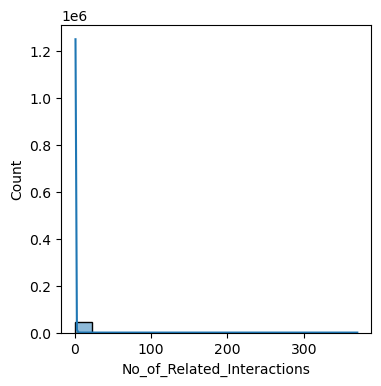

In [931]:
plt.figure(figsize=(4,4))
sns.histplot(data=data, x=data['No_of_Related_Interactions'], kde=True)

In [932]:
data["No_of_Related_Interactions"].median()

1.0

In [933]:
data["No_of_Related_Interactions"].mode()

0    1.0
Name: No_of_Related_Interactions, dtype: float64

In [934]:
data.loc[data["No_of_Related_Interactions"].isnull()==True,"No_of_Related_Interactions"]=1.0

In [935]:
data.No_of_Related_Interactions.isnull().sum()

0

In [936]:
data.columns

Index(['CI_Cat', 'CI_Subcat', 'WBS', 'Incident_ID', 'Status', 'Impact',
       'Urgency', 'Priority', 'number_cnt', 'Category', 'No_of_Reassignments',
       'Open_Time', 'Reopen_Time', 'Resolved_Time', 'Close_Time',
       'Handle_Time_hrs', 'Closure_Code', 'No_of_Related_Interactions',
       'No_of_Related_Incidents', 'No_of_Related_Changes'],
      dtype='object')

In [937]:
data.isnull().sum()

CI_Cat                            0
CI_Subcat                         0
WBS                               0
Incident_ID                       0
Status                            0
Impact                            0
Urgency                           0
Priority                          0
number_cnt                        0
Category                          0
No_of_Reassignments               0
Open_Time                         0
Reopen_Time                   44321
Resolved_Time                  1780
Close_Time                        0
Handle_Time_hrs                   0
Closure_Code                      0
No_of_Related_Interactions        0
No_of_Related_Incidents       45383
No_of_Related_Changes         46045
dtype: int64

In [938]:
data.head()

,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
0,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4.0,0.601292,incident,26.0,5/2/2012 13:32,NaN,4/11/2013 13:50,4/11/2013 13:51,"3,87,16,91,111",Other,1.0,2.0,NaN
1,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3.0,0.415050,incident,33.0,12/3/2012 15:44,2/12/2013 12:31,2/12/2013 12:36,2/12/2013 12:36,"4,35,47,86,389",Software,1.0,1.0,NaN
2,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,4.0,0.517551,request for information,3.0,29-03-2012 12:36,NaN,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1.0,NaN,NaN
3,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4.0,0.642927,incident,13.0,17-07-2012 11:49,NaN,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1.0,NaN,NaN
4,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4.0,0.345258,incident,2.0,10/8/2012 11:01,NaN,8/11/2013 13:55,8/11/2013 13:55,"3,38,39,03,333",Other,1.0,NaN,NaN


### CI Category & CI Subcategory had a lot of labels which were replaced to only take the major ones. Unknown values were replaced by Mode values.

In [939]:
data.CI_Cat.replace(['database'],'storage',inplace=True)
data.CI_Cat.replace(['applicationcomponent'],'subapplication',inplace=True)
data.CI_Cat.replace(['displaydevice','officeelectronics','Phone','networkcomponents'],'hardware',inplace=True)
data.CI_Cat.replace(np.nan,'application',inplace=True)

In [940]:
data.CI_Subcat.replace('Desktop','Desktop Application',inplace=True)
data.CI_Subcat.replace(['Application Server','Virtual Tape Server','ESX Server','zOS Server','Neoview Server','X86 Server',
                       'Unix Server','Oracle Server','Windows Server in extern beheer','Thin Client','NonStop Server',
                       'Number','Windows Server','Linux Server',np.nan,'SharePoint Farm','Lines'],
                       'Server Based Application',inplace=True)
data.CI_Subcat.replace('RAC Service','Banking Device',inplace=True)
data.CI_Subcat.replace(['Iptelephony','Protocol','Net Device','IPtelephony','ESX Cluster','Standard Application'],
                       'Web Based Application',inplace=True)
data.CI_Subcat.replace(['VMWare','Security Software','zOS Systeem','Firewall','Database Software','VDI','Instance',
                       'MQ Queue Manager','Automation Software','Citrix','SAP','Encryption'],'System Software',inplace=True)
data.CI_Subcat.replace(['UPS','Omgeving'],'Client Based Application',inplace=True)
data.CI_Subcat.replace(['NonStop Storage','NonStop Harddisk','Tape Library','zOS Cluster','DataCenterEquipment',
                       'MigratieDummy'],'Database',inplace=True)
data.CI_Subcat.replace(['Modem','Router'],'Network Component',inplace=True)
data.CI_Subcat.replace('KVM Switches','Switch',inplace=True)

In [941]:
data.isnull().sum()

CI_Cat                            0
CI_Subcat                         0
WBS                               0
Incident_ID                       0
Status                            0
Impact                            0
Urgency                           0
Priority                          0
number_cnt                        0
Category                          0
No_of_Reassignments               0
Open_Time                         0
Reopen_Time                   44321
Resolved_Time                  1780
Close_Time                        0
Handle_Time_hrs                   0
Closure_Code                      0
No_of_Related_Interactions        0
No_of_Related_Incidents       45383
No_of_Related_Changes         46045
dtype: int64

##### No_of_Related_Changes for missing values

In [942]:
data['No_of_Related_Changes'].sample(20)



5114     NaN
19029    NaN
4322     NaN
28772    NaN
26563    NaN
10287    NaN
11315    NaN
6822     NaN
45032    NaN
22032    NaN
8473     NaN
16744    NaN
15590    NaN
36400    NaN
5650     1.0
15700    NaN
10141    NaN
37309    NaN
35494    NaN
8670     NaN
Name: No_of_Related_Changes, dtype: float64

In [943]:
data['No_of_Related_Changes'].value_counts()

No_of_Related_Changes
1.0    536
2.0     21
3.0      2
9.0      1
Name: count, dtype: int64

In [944]:
data['No_of_Related_Changes'].median()

1.0

In [945]:
data['No_of_Related_Changes'] = data['No_of_Related_Changes'].fillna(2)

In [946]:
data.isnull().sum()

CI_Cat                            0
CI_Subcat                         0
WBS                               0
Incident_ID                       0
Status                            0
Impact                            0
Urgency                           0
Priority                          0
number_cnt                        0
Category                          0
No_of_Reassignments               0
Open_Time                         0
Reopen_Time                   44321
Resolved_Time                  1780
Close_Time                        0
Handle_Time_hrs                   0
Closure_Code                      0
No_of_Related_Interactions        0
No_of_Related_Incidents       45383
No_of_Related_Changes             0
dtype: int64

In [947]:
data['No_of_Related_Changes'].value_counts()

No_of_Related_Changes
2.0    46066
1.0      536
3.0        2
9.0        1
Name: count, dtype: int64

In [948]:
# No_of_Related_Incidents
data['No_of_Related_Incidents'].value_counts()


No_of_Related_Incidents
1.0     1057
2.0       74
3.0       20
4.0       13
5.0        8
6.0        8
9.0        6
8.0        5
11.0       4
12.0       4
7.0        4
17.0       3
16.0       3
10.0       2
24.0       2
14.0       1
25.0       1
23.0       1
54.0       1
26.0       1
21.0       1
63.0       1
13.0       1
15.0       1
Name: count, dtype: int64

In [949]:
data['No_of_Related_Incidents'].median()

1.0

In [950]:
data['No_of_Related_Incidents'] = data['No_of_Related_Incidents'].fillna(1)

In [951]:
data.No_of_Related_Interactions.replace(np.nan,1,inplace=True)
data.Priority.replace(np.nan,4,inplace=True)

In [952]:
data.isnull().sum()

CI_Cat                            0
CI_Subcat                         0
WBS                               0
Incident_ID                       0
Status                            0
Impact                            0
Urgency                           0
Priority                          0
number_cnt                        0
Category                          0
No_of_Reassignments               0
Open_Time                         0
Reopen_Time                   44321
Resolved_Time                  1780
Close_Time                        0
Handle_Time_hrs                   0
Closure_Code                      0
No_of_Related_Interactions        0
No_of_Related_Incidents           0
No_of_Related_Changes             0
dtype: int64

## **Check the Missing Values in percentage**

In [953]:
data.isnull().sum()

CI_Cat                            0
CI_Subcat                         0
WBS                               0
Incident_ID                       0
Status                            0
Impact                            0
Urgency                           0
Priority                          0
number_cnt                        0
Category                          0
No_of_Reassignments               0
Open_Time                         0
Reopen_Time                   44321
Resolved_Time                  1780
Close_Time                        0
Handle_Time_hrs                   0
Closure_Code                      0
No_of_Related_Interactions        0
No_of_Related_Incidents           0
No_of_Related_Changes             0
dtype: int64

In [954]:
data.isnull().sum()/len(data)*100

CI_Cat                         0.000000
CI_Subcat                      0.000000
WBS                            0.000000
Incident_ID                    0.000000
Status                         0.000000
Impact                         0.000000
Urgency                        0.000000
Priority                       0.000000
number_cnt                     0.000000
Category                       0.000000
No_of_Reassignments            0.000000
Open_Time                      0.000000
Reopen_Time                   95.099238
Resolved_Time                  3.819333
Close_Time                     0.000000
Handle_Time_hrs                0.000000
Closure_Code                   0.000000
No_of_Related_Interactions     0.000000
No_of_Related_Incidents        0.000000
No_of_Related_Changes          0.000000
dtype: float64

Here, The Data shows Reopen Time shows above 95% of missing values. so we drop these column.

In [955]:
data.drop("Reopen_Time",axis=1,inplace=True)

In [956]:
data.columns

Index(['CI_Cat', 'CI_Subcat', 'WBS', 'Incident_ID', 'Status', 'Impact',
       'Urgency', 'Priority', 'number_cnt', 'Category', 'No_of_Reassignments',
       'Open_Time', 'Resolved_Time', 'Close_Time', 'Handle_Time_hrs',
       'Closure_Code', 'No_of_Related_Interactions', 'No_of_Related_Incidents',
       'No_of_Related_Changes'],
      dtype='object')

# **Check for Outliers**

In [957]:
num_data=data.select_dtypes(include=["int64","float64"]).columns

In [958]:
num_data

Index(['Priority', 'number_cnt', 'No_of_Reassignments',
       'No_of_Related_Interactions', 'No_of_Related_Incidents',
       'No_of_Related_Changes'],
      dtype='object')

In [959]:
cat_data

Index(['CI_Cat', 'CI_Subcat', 'WBS', 'Incident_ID', 'Status', 'Impact',
       'Urgency', 'Category', 'Alert_Status', 'Open_Time', 'Reopen_Time',
       'Resolved_Time', 'Close_Time', 'Handle_Time_hrs', 'Closure_Code'],
      dtype='object')

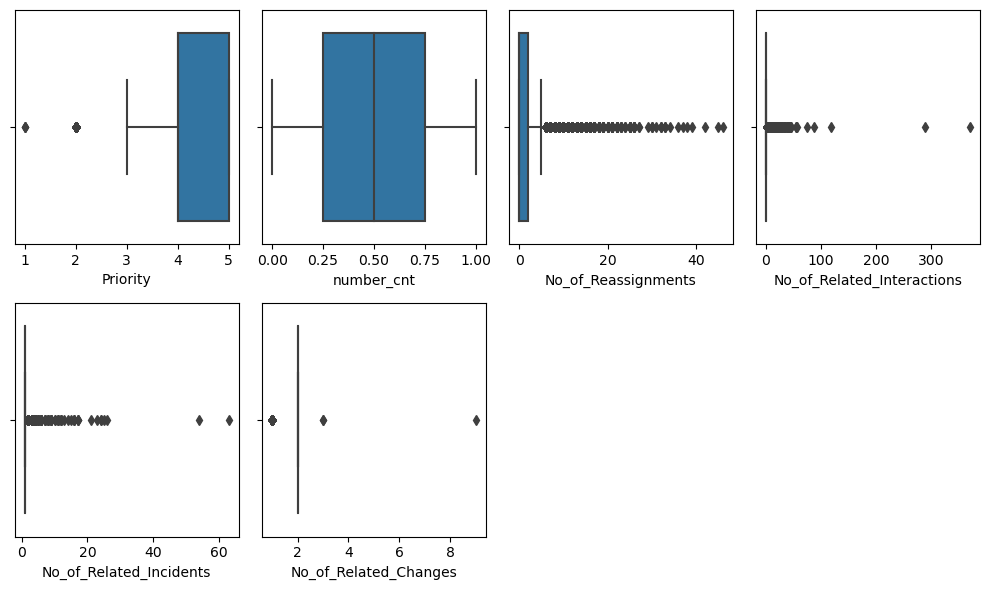

In [960]:
plt.figure(figsize=(10,6))
plotnumber=1
for col in num_data:
  if plotnumber<8:
    ax=plt.subplot(2,4,plotnumber)
    sns.boxplot(x=data[col])
    plt.xlabel(col,fontsize=10)

  plotnumber+=1
plt.tight_layout()

## **Box Plot for number_cnt**

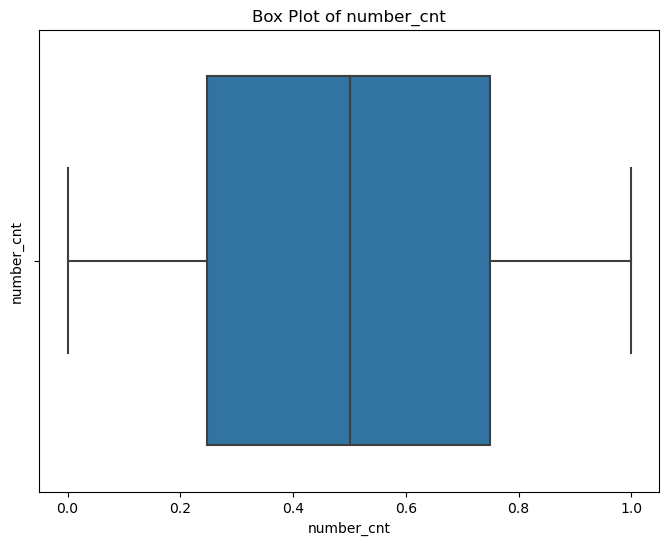

In [961]:
# Create a box plot for the 'number_cnt' column
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['number_cnt'])
plt.title('Box Plot of number_cnt')
plt.ylabel('number_cnt')
plt.show()


## **Box Plot for No_of_Reassignments**

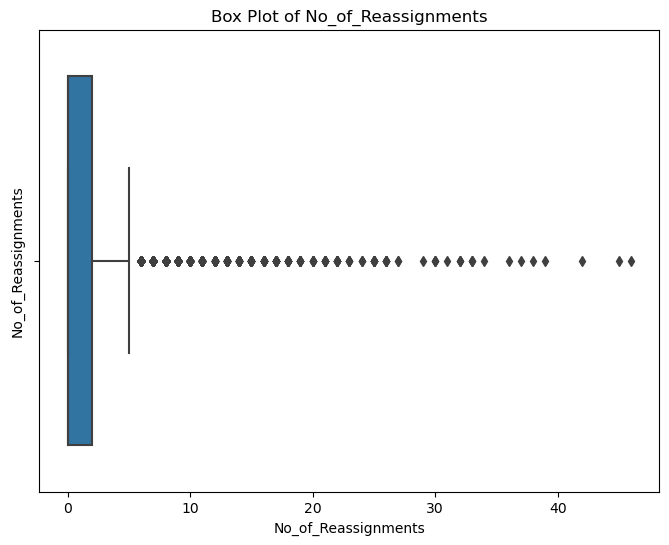

In [962]:
# Create a box plot for the 'number_cnt' column
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['No_of_Reassignments'])
plt.title('Box Plot of No_of_Reassignments')
plt.ylabel('No_of_Reassignments')
plt.show()

## **Outliers Handle for No_of_Reassignments**

<Axes: xlabel='No_of_Reassignments', ylabel='Count'>

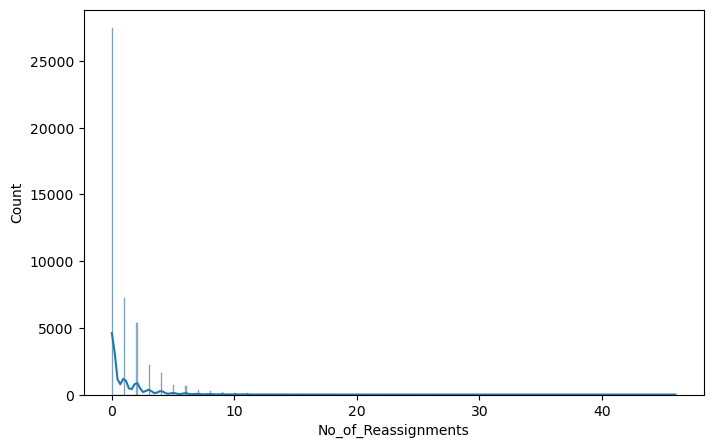

In [963]:
plt.figure(figsize=(8,5))
sns.histplot(data=data,x='No_of_Reassignments',kde=True)

### **Insights**
* Most tickets (0 reassignments) are resolved without being reassigned.
* Reassignments decrease exponentially.
* There is a small peak at 3 reassignments.
* The graph is skewed to the right, meaning more tickets have a few reassignments than many reassignments.

In [964]:
Q1=data["No_of_Reassignments"].quantile(0.25)
print("lower_quartile",Q1)
Q3=data["No_of_Reassignments"].quantile(0.75)
print("upper_quartile",Q3)

lower_quartile 0.0
upper_quartile 2.0


In [965]:
IQR=Q3-Q1
IQR

2.0

In [966]:
lower_limit=Q1-1.5*IQR
print("lower_limit is",lower_limit)
upper_limit=Q3+1.5*IQR
print("upper_limit is",upper_limit)

lower_limit is -3.0
upper_limit is 5.0


In [967]:
data.loc[data["No_of_Reassignments"]>upper_limit]

,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
0,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4.0,0.601292,incident,26.0,5/2/2012 13:32,4/11/2013 13:50,4/11/2013 13:51,"3,87,16,91,111",Other,1.0,2.0,2.0
1,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3.0,0.415050,incident,33.0,12/3/2012 15:44,2/12/2013 12:36,2/12/2013 12:36,"4,35,47,86,389",Software,1.0,1.0,2.0
3,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4.0,0.642927,incident,13.0,17-07-2012 11:49,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1.0,1.0,2.0
10,application,Web Based Application,WBS000088,IM0000019,Closed,4,4,4.0,0.439909,incident,6.0,21-09-2012 12:56,8/11/2013 14:23,8/11/2013 14:23,"3,06,74,49,167",Software,1.0,1.0,1.0
11,application,Web Based Application,WBS000088,IM0000020,Closed,4,4,4.0,0.291928,incident,8.0,1/10/2012 10:49,8/11/2013 14:18,8/11/2013 14:22,"1,32,26,19,167",Software,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44961,application,Server Based Application,WBS000199,IM0045375,Closed,3,3,3.0,0.267787,incident,10.0,21-03-2014 15:57,31-03-2014 17:28,31-03-2014 17:28,"5,81,92,22,222",Other,2.0,1.0,2.0
45040,application,Server Based Application,WBS000152,IM0045455,Closed,5,5,5.0,0.680022,incident,6.0,24-03-2014 09:57,25-03-2014 14:30,25-03-2014 14:30,"1,50,36,66,667",Software,1.0,1.0,2.0
45196,application,Server Based Application,WBS000263,IM0045618,Closed,4,4,4.0,0.449103,incident,7.0,24-03-2014 13:33,26-03-2014 08:43,26-03-2014 08:43,"1,61,62,77,778",Other,1.0,1.0,2.0
45273,application,Desktop Application,WBS000089,IM0045696,Closed,4,4,4.0,0.166302,incident,8.0,25-03-2014 08:40,31-03-2014 12:48,31-03-2014 12:48,"3,17,67,22,222",Software,1.0,1.0,2.0


In [968]:
len(data.loc[data["No_of_Reassignments"]>upper_limit])/len(data)

0.042334513464220576

In [969]:
data.loc[data["No_of_Reassignments"]>upper_limit,"No_of_Reassignments"]=data["No_of_Reassignments"].median()

<Axes: xlabel='No_of_Reassignments'>

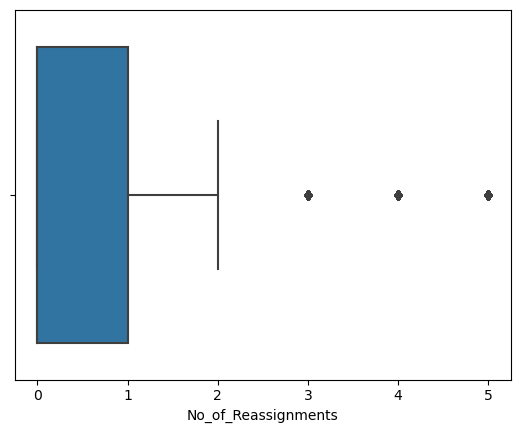

In [970]:
sns.boxplot(x=data.No_of_Reassignments)

## **Box Plot for No_of_Related_Interactions**

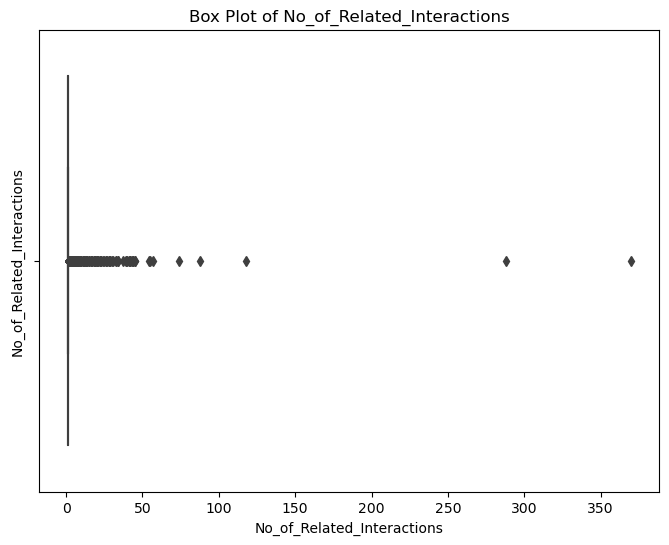

In [971]:
# Create a box plot for the 'No_of_Related_Interactions' column
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['No_of_Related_Interactions'])
plt.title('Box Plot of No_of_Related_Interactions')
plt.ylabel('No_of_Related_Interactions')
plt.show()

## **Outliers Handle for No_of_Related_Interactions**

<Axes: xlabel='No_of_Related_Interactions', ylabel='Count'>

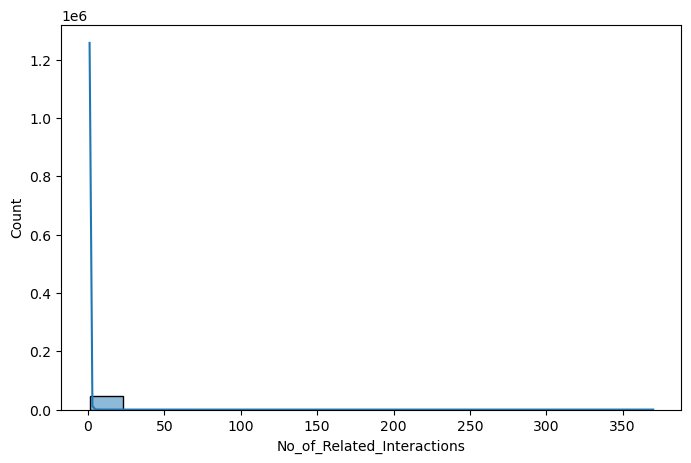

In [972]:
plt.figure(figsize=(8,5))
sns.histplot(data=data,x='No_of_Related_Interactions',kde=True)

### **Insights**
* Most tickets (0 reassignments) are resolved without being reassigned.
* Reassignments decrease exponentially.
* There is a small peak at 3 reassignments.
* The graph is skewed to the right, meaning more tickets have a few reassignments than many reassignments.

In [973]:
Q1 = data["No_of_Related_Interactions"].quantile(0.25)
print("lower_quantile",Q1)
Q3 = data["No_of_Related_Interactions"].quantile(0.75)
print("upper_quantile",Q3)

lower_quantile 1.0
upper_quantile 1.0


In [974]:
IQR=Q3 - Q1
IQR

0.0

In [975]:
lower_limit = Q1-1.5*IQR
print("lower_limit is",lower_limit)
upper_limit = Q3+1.5*IQR
print("upper_limit is",upper_limit)

lower_limit is 1.0
upper_limit is 1.0


In [976]:
data.loc[data["No_of_Related_Interactions"]>upper_limit]

,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
12,application,Web Based Application,WBS000055,IM0000021,Closed,4,4,4.0,0.776486,incident,5.0,2/10/2012 12:12,4/2/2014 9:38,4/2/2014 9:38,"1,13,24,28,333",Software,2.0,1.0,2.0
18,application,Desktop Application,WBS000092,IM0000033,Closed,3,3,3.0,0.860255,incident,0.0,7/12/2012 14:34,30-11-2013 10:39,30-11-2013 10:39,"2,62,67,33,889",Other,2.0,1.0,2.0
19,application,Web Based Application,WBS000055,IM0000034,Closed,5,5,5.0,0.663615,incident,5.0,10/12/2012 14:44,28-03-2014 14:20,28-03-2014 14:20,"9,31,78,08,333",Other,2.0,1.0,2.0
27,application,Server Based Application,WBS000071,IM0000048,Closed,5,5,5.0,0.748361,request for information,0.0,6/2/2013 14:07,17-10-2013 14:00,17-10-2013 14:00,"3,88,55,55,556",No error - works as designed,2.0,1.0,2.0
29,application,Server Based Application,WBS000072,IM0000053,Closed,5,5,5.0,0.853722,request for information,2.0,18-02-2013 11:59,NaN,4/12/2013 14:00,"2,77,45,55,556",Other,2.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46455,application,Server Based Application,WBS000099,IM0046904,Closed,4,4,4.0,0.175887,incident,1.0,31-03-2014 08:41,31-03-2014 11:56,31-03-2014 11:56,"1,55,94,44,444",Other,2.0,1.0,2.0
46458,application,Server Based Application,WBS000048,IM0046907,Closed,5,5,5.0,0.969598,incident,0.0,31-03-2014 08:58,31-03-2014 09:30,31-03-2014 09:30,"0,084722222",Software,2.0,1.0,2.0
46460,application,Server Based Application,WBS000048,IM0046909,Closed,5,3,4.0,0.628989,incident,0.0,31-03-2014 09:05,31-03-2014 09:28,31-03-2014 09:29,"0,407777778",Software,2.0,1.0,2.0
46471,application,Server Based Application,WBS000048,IM0046921,Closed,5,5,5.0,0.280788,incident,0.0,31-03-2014 08:17,31-03-2014 09:19,31-03-2014 09:19,"1,03",Software,2.0,1.0,2.0


In [977]:
data.loc[data["No_of_Related_Interactions"]<lower_limit]

,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes


In [978]:
len(data.loc[data["No_of_Related_Interactions"]>upper_limit])/len(data)

0.07368308121446197

In [979]:
data.loc[data["No_of_Related_Interactions"]>upper_limit,"No_of_Related_Interactions"]=data["No_of_Related_Interactions"].median()

<Axes: xlabel='No_of_Related_Interactions'>

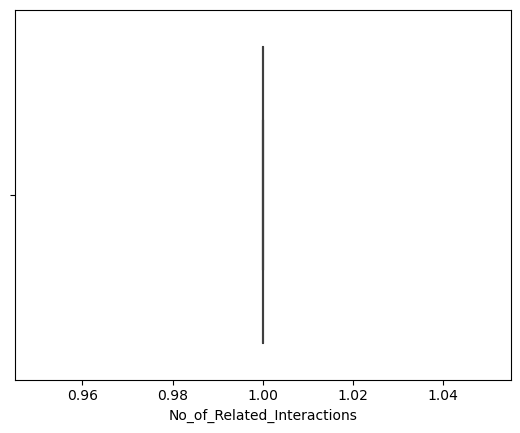

In [980]:
sns.boxplot(x=data.No_of_Related_Interactions)

* Median number of related interactions is 1.
* 75% of tickets have 3 or fewer related interactions.
* There are a few outliers with many related interactions (up to 20).


## **Box Plot for No_of_Related_Incidents**

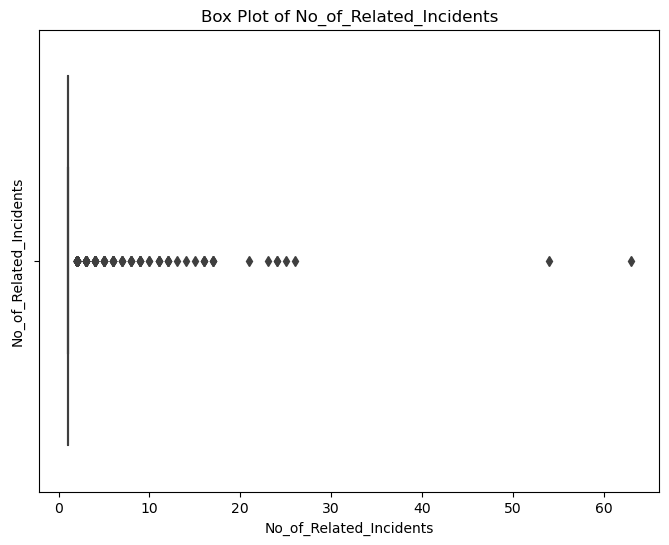

In [981]:
# Create a box plot for the 'No_of_Related_Incidents' column
plt.figure(figsize=(8,6))
sns.boxplot(x=data['No_of_Related_Incidents'])
plt.title('Box Plot of No_of_Related_Incidents')
plt.ylabel('No_of_Related_Incidents')
plt.show()

## **Outliers Handle for No_of_Related_Incidents**

<Axes: xlabel='No_of_Related_Incidents', ylabel='Count'>

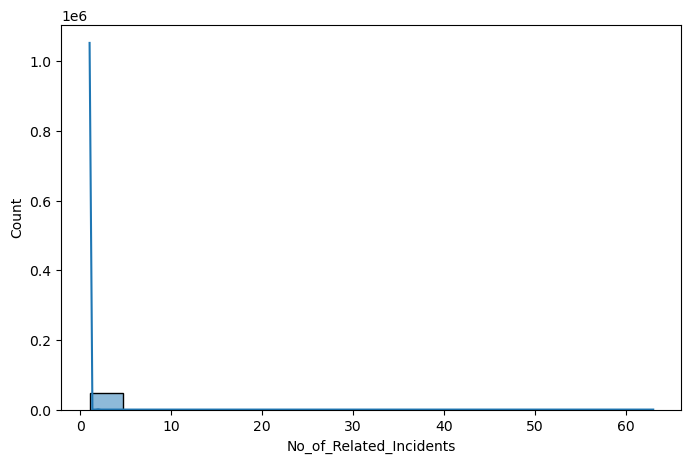

In [982]:
plt.figure(figsize=(8,5))
sns.histplot(data=data,x='No_of_Related_Incidents',kde=True)

## Insights
* The most common number of related incidents is 1.
* The distribution of the number of related incidents is skewed to the right, meaning that there are more incidents with fewer related incidents than incidents with more related incidents.
*The maximum number of related incidents is 53.

In [983]:
Q1=data["No_of_Related_Incidents"].quantile(0.25)
print("lower_quartile",Q1)
Q3=data["No_of_Related_Incidents"].quantile(0.75)
print("upper_quartile",Q3)

lower_quartile 1.0
upper_quartile 1.0


In [984]:
IQR=Q3-Q1
IQR

0.0

In [985]:
lower_limit=Q1-1.5*IQR
print("lower_limit is",lower_limit)
upper_limit=Q3+1.5*IQR
print("upper_limit is",upper_limit)

lower_limit is 1.0
upper_limit is 1.0


In [986]:
data.loc[data["No_of_Related_Incidents"]>upper_limit]

,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
0,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4.0,0.601292,incident,0.0,5/2/2012 13:32,4/11/2013 13:50,4/11/2013 13:51,"3,87,16,91,111",Other,1.0,2.0,2.0
13,application,Web Based Application,WBS000088,IM0000022,Closed,4,4,4.0,0.592713,incident,0.0,15-10-2012 15:50,NaN,14-11-2013 13:33,"6,67,54,16,667",Software,1.0,2.0,2.0
15,application,Web Based Application,WBS000055,IM0000024,Closed,4,4,4.0,0.701705,incident,3.0,23-10-2012 12:01,8/11/2013 14:57,8/11/2013 14:58,"2,83,79,50,556",Other,1.0,2.0,2.0
20,application,Web Based Application,WBS000088,IM0000035,Closed,4,4,4.0,0.428148,incident,0.0,24-12-2012 16:31,14-11-2013 09:49,14-11-2013 09:49,"1,93,04,83,333",Referred,1.0,2.0,2.0
119,application,Web Based Application,WBS000066,IM0000168,Closed,5,5,5.0,0.875886,incident,2.0,26-06-2013 12:09,18-11-2013 09:14,18-11-2013 09:15,"5,23,78,69,444",Software,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45336,application,Server Based Application,WBS000307,IM0045761,Closed,3,3,3.0,0.496306,incident,0.0,25-03-2014 03:30,25-03-2014 15:45,25-03-2014 15:46,"2,84,83,33,333",Hardware,1.0,2.0,2.0
45411,application,Desktop Application,WBS000092,IM0045838,Closed,2,3,2.0,0.427608,incident,1.0,25-03-2014 11:56,26-03-2014 08:10,26-03-2014 08:11,"7,16,91,66,667",Software,1.0,15.0,1.0
45962,subapplication,Web Based Application,WBS000162,IM0046398,Closed,2,2,2.0,0.922142,incident,0.0,27-03-2014 08:22,27-03-2014 09:31,27-03-2014 09:33,"1,19,55,55,556",Other,1.0,8.0,2.0
46263,subapplication,Web Based Application,WBS000073,IM0046710,Closed,5,5,5.0,0.572573,incident,2.0,28-03-2014 10:19,29-03-2014 08:24,29-03-2014 08:24,"7,66,86,11,111",Other,1.0,2.0,2.0


In [987]:
len(data.loc[data["No_of_Related_Incidents"]>upper_limit])/len(data)

0.003540392661731574

In [988]:
data.loc[data["No_of_Related_Incidents"]>upper_limit,"No_of_Related_Incidents"]=data["No_of_Related_Incidents"].median()

<Axes: xlabel='No_of_Related_Incidents'>

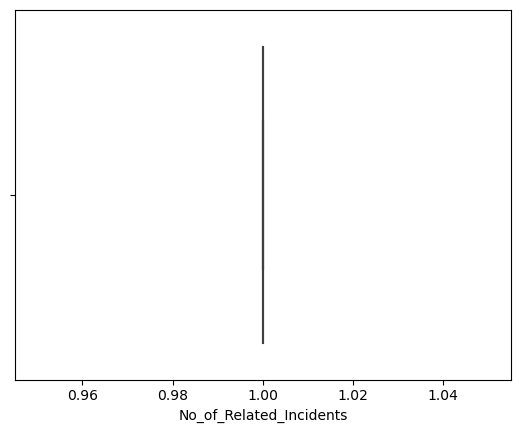

In [989]:
sns.boxplot(x=data.No_of_Related_Incidents)

## **Box Plot for No_of_Related_Changes**

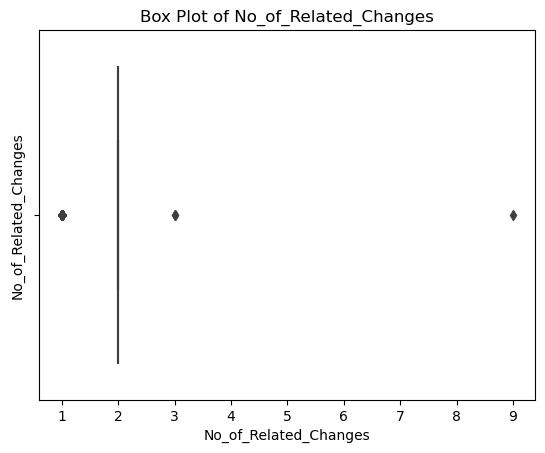

In [990]:
# Create a box plot for the 'No_of_Related_Changes' column
sns.boxplot(x=data['No_of_Related_Changes'])
plt.title('Box Plot of No_of_Related_Changes')
plt.ylabel('No_of_Related_Changes')
plt.show()

## Outliers Handle for No_of_Related_changes

<Axes: xlabel='No_of_Related_Changes', ylabel='Count'>

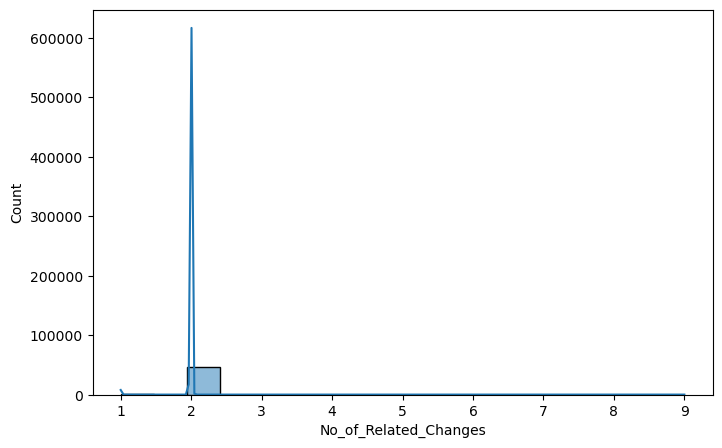

In [991]:
plt.figure(figsize=(8,5))
sns.histplot(data=data,x='No_of_Related_Changes',kde=True)

### **Insights**
* The most common number of related changes is 1.
* The distribution of the number of related changes is skewed to the right, meaning that there are more changes with fewer related changes than changes with more related changes.
* The maximum number of related changes is 53.
* The median number of related changes is 2.
* The 75th percentile of the number of related changes is 4.
* The 95th percentile of the number of related changes is 10.

In [992]:
Q1=data["No_of_Related_Changes"].quantile(0.25)
print("lower_quartile",Q1)
Q3=data["No_of_Related_Changes"].quantile(0.75)
print("upper_quartile",Q3)

lower_quartile 2.0
upper_quartile 2.0


In [993]:
IQR=Q3-Q1
IQR

0.0

In [994]:
lower_limit=Q1-1.5*IQR
print("lower_limit is",lower_limit)
upper_limit=Q3+1.5*IQR
print("upper_limit is",upper_limit)

lower_limit is 2.0
upper_limit is 2.0


In [995]:
data.loc[data["No_of_Related_Changes"]>upper_limit]

,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
360,application,Web Based Application,WBS000088,IM0000433,Closed,4,4,4.0,0.261065,incident,0.0,10/9/2013 13:09,5/12/2013 10:16,5/12/2013 10:17,"6,48,13,36,111",Unknown,1.0,1.0,3.0
24182,subapplication,Web Based Application,WBS000015,IM0024438,Closed,3,3,3.0,0.870326,incident,4.0,30-12-2013 11:40,20-01-2014 12:06,20-01-2014 12:06,"8,21,34,44,444",Software,1.0,1.0,9.0
42082,application,Web Based Application,WBS000302,IM0042443,Closed,4,4,4.0,0.582007,incident,2.0,10/3/2014 16:17,26-03-2014 16:28,26-03-2014 16:28,"10,78,325",Software,1.0,1.0,3.0


In [996]:
len(data.loc[data["No_of_Related_Changes"]>upper_limit])/len(data)

6.43707756678468e-05

In [997]:
data.loc[data["No_of_Related_Changes"]>upper_limit,"No_of_Related_Changes"]=data["No_of_Related_Changes"].median()

<Axes: xlabel='No_of_Related_Changes'>

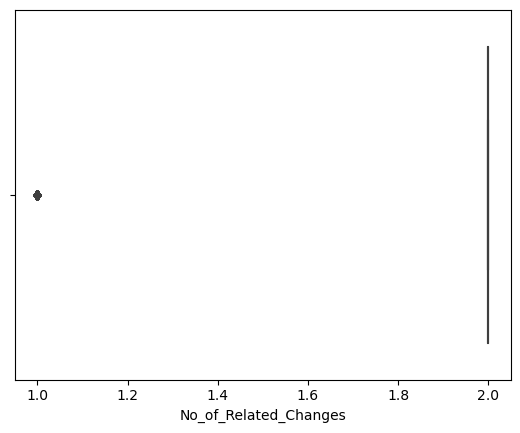

In [998]:
sns.boxplot(x=data.No_of_Related_Changes)

# **Feature Engineering**

In [999]:
cat_data

Index(['CI_Cat', 'CI_Subcat', 'WBS', 'Incident_ID', 'Status', 'Impact',
       'Urgency', 'Category', 'Alert_Status', 'Open_Time', 'Reopen_Time',
       'Resolved_Time', 'Close_Time', 'Handle_Time_hrs', 'Closure_Code'],
      dtype='object')

# **Feature Encoding**

## Converting categorical columns to Numeric columns

#### For CI_Cat column

In [1000]:
data.CI_Cat.unique()
data.CI_Cat.value_counts()

CI_Cat
application       33010
subapplication     7787
computer           3643
storage             917
hardware            915
software            333
Name: count, dtype: int64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'application'),
  Text(1, 0, 'subapplication'),
  Text(2, 0, 'computer'),
  Text(3, 0, 'storage'),
  Text(4, 0, 'hardware'),
  Text(5, 0, 'software')])

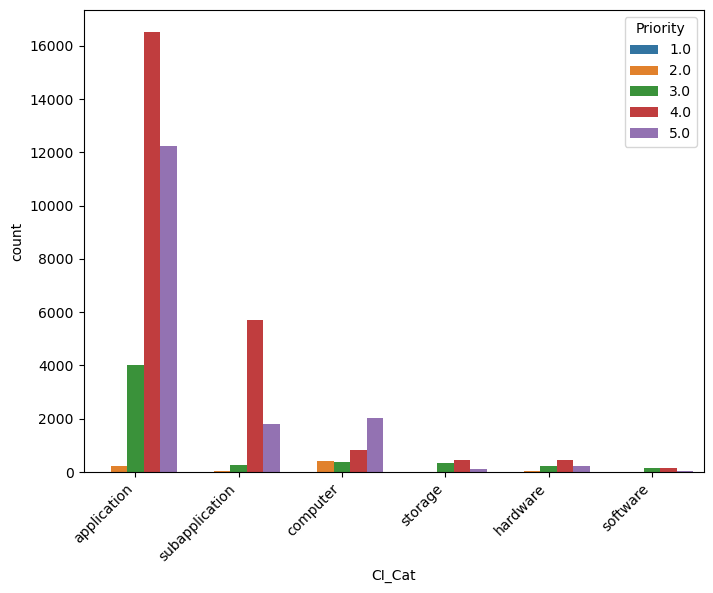

In [1001]:
plt.figure(figsize=(8,6))
sns.countplot(data=data,x="CI_Cat",hue="Priority",order=data["CI_Cat"].value_counts().index)
plt.xticks(rotation=45, ha="right")


In [1002]:

CI_Cat= {
     'application':6,
     'subapplication':5,    
      'computer': 4,         
      'storage': 3,            
      'hardware': 2,           
       'software': 1           
  }

# Map the 'CI_Cat' column to numeric values
data['CI_Cat'] = data['CI_Cat'].map(CI_Cat)




In [1003]:
data.head(2)

,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
0,5,Web Based Application,WBS000162,IM0000004,Closed,4,4,4.0,0.601292,incident,0.0,5/2/2012 13:32,4/11/2013 13:50,4/11/2013 13:51,"3,87,16,91,111",Other,1.0,1.0,2.0
1,6,Web Based Application,WBS000088,IM0000005,Closed,3,3,3.0,0.415050,incident,0.0,12/3/2012 15:44,2/12/2013 12:36,2/12/2013 12:36,"4,35,47,86,389",Software,1.0,1.0,2.0


#### converting for CI_subcat

In [1004]:
data.CI_Subcat.unique()
data.CI_Subcat.value_counts()

CI_Subcat
Server Based Application    19207
Web Based Application       15422
Desktop Application          4299
System Software              2363
Laptop                       1921
Banking Device                917
Client Based Application      579
Database                      570
SAN                           549
Monitor                       212
Controller                    146
Exchange                      130
Printer                        88
Scanner                        64
Switch                         60
Network Component              51
Keyboard                       27
Name: count, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Server Based Application'),
  Text(1, 0, 'Web Based Application'),
  Text(2, 0, 'Desktop Application'),
  Text(3, 0, 'System Software'),
  Text(4, 0, 'Laptop'),
  Text(5, 0, 'Banking Device'),
  Text(6, 0, 'Client Based Application'),
  Text(7, 0, 'Database'),
  Text(8, 0, 'SAN'),
  Text(9, 0, 'Monitor'),
  Text(10, 0, 'Controller'),
  Text(11, 0, 'Exchange'),
  Text(12, 0, 'Printer'),
  Text(13, 0, 'Scanner'),
  Text(14, 0, 'Switch'),
  Text(15, 0, 'Network Component'),
  Text(16, 0, 'Keyboard')])

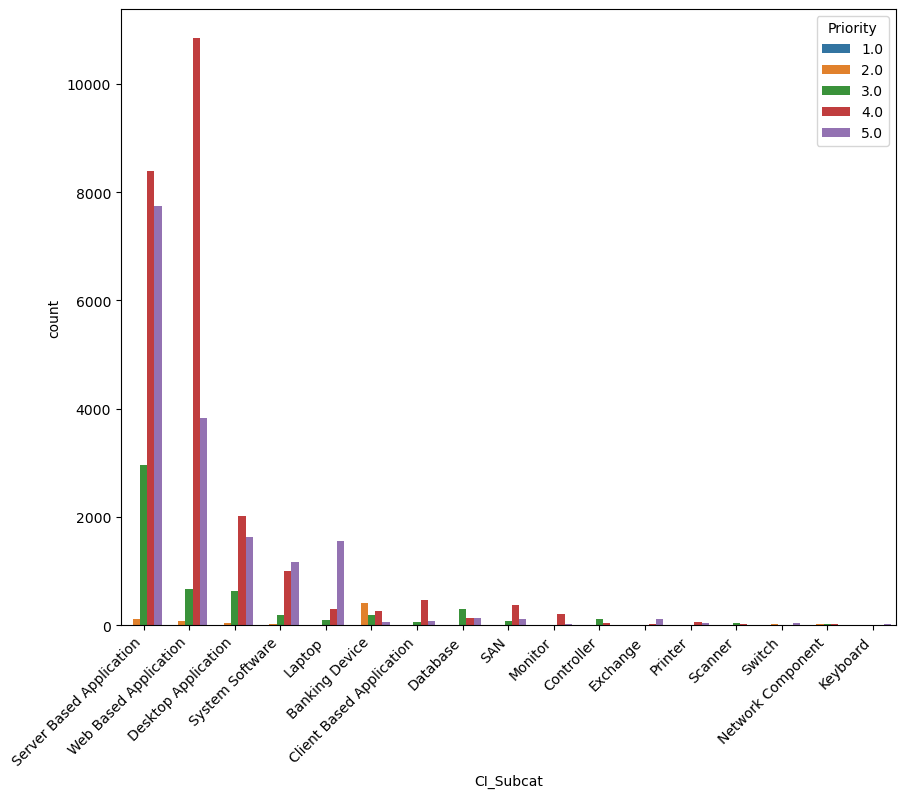

In [1005]:
plt.figure(figsize=(10,8))
sns.countplot(data=data,x="CI_Subcat",hue="Priority",order=data["CI_Subcat"].value_counts().index)
plt.xticks(rotation=45,ha="right")

In [1006]:
category_mapping = {
    'Server Based Application': 1,
    'Web Based Application': 2,
    'Desktop Application': 3,
    'System Software': 4,
    'Laptop': 5,
    'Banking Device': 6,
    'Client Based Application': 7,
    'Database': 8,
    'SAN': 9,
    'Monitor': 10,
    'Controller': 11,
    'Exchange': 12,
    'Printer': 13,
    'Scanner': 14,
    'Switch': 15,
    'Network Component': 16,
    'Keyboard': 17
}

data['CI_Subcat'] = data['CI_Subcat'].map(category_mapping)


In [1007]:
data.head(5)

,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
0,5,2,WBS000162,IM0000004,Closed,4,4,4.0,0.601292,incident,0.0,5/2/2012 13:32,4/11/2013 13:50,4/11/2013 13:51,"3,87,16,91,111",Other,1.0,1.0,2.0
1,6,2,WBS000088,IM0000005,Closed,3,3,3.0,0.415050,incident,0.0,12/3/2012 15:44,2/12/2013 12:36,2/12/2013 12:36,"4,35,47,86,389",Software,1.0,1.0,2.0
2,6,3,WBS000092,IM0000006,Closed,NS,3,4.0,0.517551,request for information,3.0,29-03-2012 12:36,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1.0,1.0,2.0
3,6,2,WBS000088,IM0000011,Closed,4,4,4.0,0.642927,incident,0.0,17-07-2012 11:49,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1.0,1.0,2.0
4,6,2,WBS000088,IM0000012,Closed,4,4,4.0,0.345258,incident,2.0,10/8/2012 11:01,8/11/2013 13:55,8/11/2013 13:55,"3,38,39,03,333",Other,1.0,1.0,2.0


##### converting for status

In [1008]:
data.Status.unique()
data.Status.value_counts()

Status
Closed              46596
Work in progress        9
Name: count, dtype: int64

<Axes: xlabel='Status', ylabel='count'>

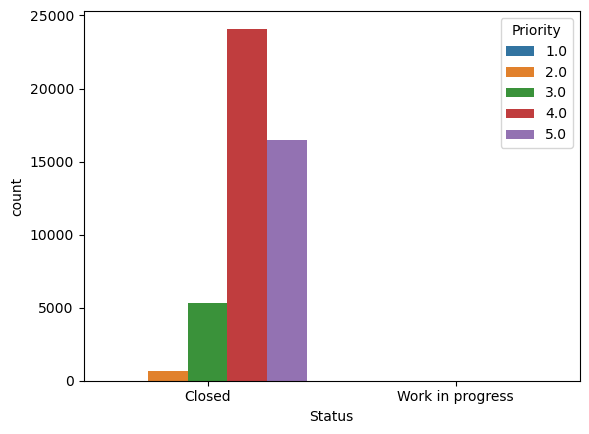

In [1009]:
sns.countplot(data=data,x="Status",hue="Priority")

In [1010]:
# Define a mapping for the 'Status' column
status_mapping = {
    'Closed': 1,
    'Work in progress': 0
}

# Map the 'Status' column to numeric values
data['Status'] =data['Status'].map(status_mapping)


In [1011]:
data.head(5)

,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
0,5,2,WBS000162,IM0000004,1,4,4,4.0,0.601292,incident,0.0,5/2/2012 13:32,4/11/2013 13:50,4/11/2013 13:51,"3,87,16,91,111",Other,1.0,1.0,2.0
1,6,2,WBS000088,IM0000005,1,3,3,3.0,0.415050,incident,0.0,12/3/2012 15:44,2/12/2013 12:36,2/12/2013 12:36,"4,35,47,86,389",Software,1.0,1.0,2.0
2,6,3,WBS000092,IM0000006,1,NS,3,4.0,0.517551,request for information,3.0,29-03-2012 12:36,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1.0,1.0,2.0
3,6,2,WBS000088,IM0000011,1,4,4,4.0,0.642927,incident,0.0,17-07-2012 11:49,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1.0,1.0,2.0
4,6,2,WBS000088,IM0000012,1,4,4,4.0,0.345258,incident,2.0,10/8/2012 11:01,8/11/2013 13:55,8/11/2013 13:55,"3,38,39,03,333",Other,1.0,1.0,2.0


#### converting for impact


In [1012]:
data.Impact.unique()
data.Impact.value_counts()


Impact
4     22556
5     16740
3      5234
NS     1380
2       692
1         3
Name: count, dtype: int64

<Axes: xlabel='Impact', ylabel='count'>

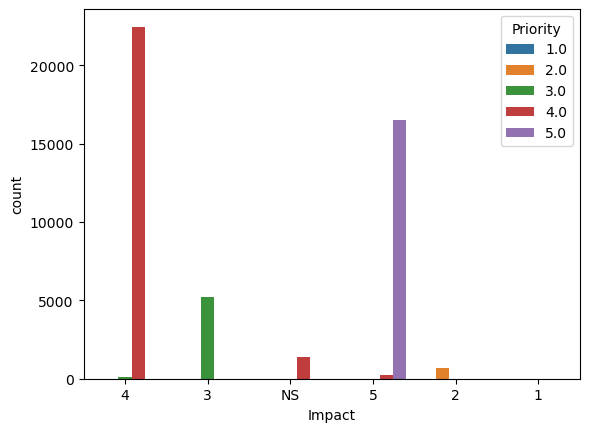

In [1013]:
sns.countplot(data=data,x="Impact",hue="Priority")

In [1014]:
Impact_mapping={
    "4":5,
    "5":4,
    "3":3,
    "NS":2,
    "2":1,
    "1":0
}
data["Impact"]=data["Impact"].map(Impact_mapping)

In [1015]:
data.head(5)

,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
0,5,2,WBS000162,IM0000004,1,5,4,4.0,0.601292,incident,0.0,5/2/2012 13:32,4/11/2013 13:50,4/11/2013 13:51,"3,87,16,91,111",Other,1.0,1.0,2.0
1,6,2,WBS000088,IM0000005,1,3,3,3.0,0.415050,incident,0.0,12/3/2012 15:44,2/12/2013 12:36,2/12/2013 12:36,"4,35,47,86,389",Software,1.0,1.0,2.0
2,6,3,WBS000092,IM0000006,1,2,3,4.0,0.517551,request for information,3.0,29-03-2012 12:36,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1.0,1.0,2.0
3,6,2,WBS000088,IM0000011,1,5,4,4.0,0.642927,incident,0.0,17-07-2012 11:49,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1.0,1.0,2.0
4,6,2,WBS000088,IM0000012,1,5,4,4.0,0.345258,incident,2.0,10/8/2012 11:01,8/11/2013 13:55,8/11/2013 13:55,"3,38,39,03,333",Other,1.0,1.0,2.0


#### converting for urgency

In [1016]:
data.Urgency.unique()
data.Urgency.value_counts()

Urgency
4               15526
5               12283
4                7062
5                4495
3                4419
3                2117
2                 538
2                 158
1                   5
1                   1
5 - Very Low        1
Name: count, dtype: int64

<Axes: xlabel='Urgency', ylabel='count'>

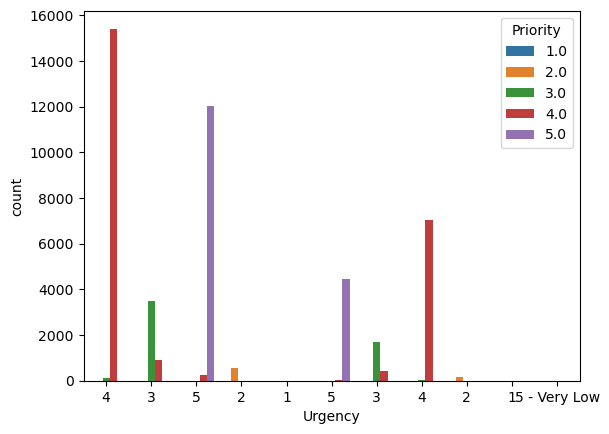

In [1017]:
sns.countplot(data=data,x="Urgency",hue="Priority")

In [1018]:
# # Define a mapping for the 'Urgency' column
urgency_mapping = {
   1: 1,
   1: 2,
   2: 3,
   2: 4,
   3: 5,
   3: 6,
   5: 7,
   5: 8,
   4: 9,
   4: 10,
  '5 - Very Low': 0  # Assuming '5 - Very Low' is mapped to 0
}

# Map the 'Urgency' column to numeric values
data['Urgency'] = data['Urgency'].map(urgency_mapping)





In [1019]:
data.head(5)

,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
0,5,2,WBS000162,IM0000004,1,5,10.0,4.0,0.601292,incident,0.0,5/2/2012 13:32,4/11/2013 13:50,4/11/2013 13:51,"3,87,16,91,111",Other,1.0,1.0,2.0
1,6,2,WBS000088,IM0000005,1,3,6.0,3.0,0.415050,incident,0.0,12/3/2012 15:44,2/12/2013 12:36,2/12/2013 12:36,"4,35,47,86,389",Software,1.0,1.0,2.0
2,6,3,WBS000092,IM0000006,1,2,6.0,4.0,0.517551,request for information,3.0,29-03-2012 12:36,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1.0,1.0,2.0
3,6,2,WBS000088,IM0000011,1,5,10.0,4.0,0.642927,incident,0.0,17-07-2012 11:49,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1.0,1.0,2.0
4,6,2,WBS000088,IM0000012,1,5,10.0,4.0,0.345258,incident,2.0,10/8/2012 11:01,8/11/2013 13:55,8/11/2013 13:55,"3,38,39,03,333",Other,1.0,1.0,2.0


#### converting for category

In [1020]:
data.Category.unique()
data.Category.value_counts()

Category
incident                   37748
request for information     8846
complaint                     11
Name: count, dtype: int64

<Axes: xlabel='Category', ylabel='count'>

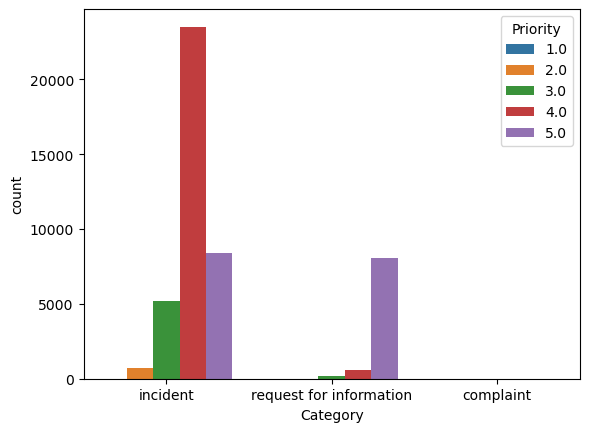

In [1021]:
sns.countplot(data=data,x="Category",hue="Priority")

In [1022]:
Category_mapping={
    "incident":2,
    "request for information":1,
    "complaint":0
}
data["Category"]=data["Category"].map(Category_mapping)

In [1023]:
data.head(5)

,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
0,5,2,WBS000162,IM0000004,1,5,10.0,4.0,0.601292,2,0.0,5/2/2012 13:32,4/11/2013 13:50,4/11/2013 13:51,"3,87,16,91,111",Other,1.0,1.0,2.0
1,6,2,WBS000088,IM0000005,1,3,6.0,3.0,0.415050,2,0.0,12/3/2012 15:44,2/12/2013 12:36,2/12/2013 12:36,"4,35,47,86,389",Software,1.0,1.0,2.0
2,6,3,WBS000092,IM0000006,1,2,6.0,4.0,0.517551,1,3.0,29-03-2012 12:36,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1.0,1.0,2.0
3,6,2,WBS000088,IM0000011,1,5,10.0,4.0,0.642927,2,0.0,17-07-2012 11:49,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1.0,1.0,2.0
4,6,2,WBS000088,IM0000012,1,5,10.0,4.0,0.345258,2,2.0,10/8/2012 11:01,8/11/2013 13:55,8/11/2013 13:55,"3,38,39,03,333",Other,1.0,1.0,2.0


In [1024]:
cat_data

Index(['CI_Cat', 'CI_Subcat', 'WBS', 'Incident_ID', 'Status', 'Impact',
       'Urgency', 'Category', 'Alert_Status', 'Open_Time', 'Reopen_Time',
       'Resolved_Time', 'Close_Time', 'Handle_Time_hrs', 'Closure_Code'],
      dtype='object')

#### converting for closure_code


In [1025]:
data.Closure_Code.unique()
data.Closure_Code.value_counts()

Closure_Code
Other                           16470
Software                        13026
User error                       3554
No error - works as designed     3530
Hardware                         2999
Data                             2209
Unknown                          1590
Operator error                   1539
User manual not used              765
other                             460
Inquiry                           162
Referred                          158
Questions                         132
Kwaliteit van de output            10
Overig                              1
Name: count, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Other'),
  Text(1, 0, 'Software'),
  Text(2, 0, 'User error'),
  Text(3, 0, 'No error - works as designed'),
  Text(4, 0, 'Hardware'),
  Text(5, 0, 'Data'),
  Text(6, 0, 'Unknown'),
  Text(7, 0, 'Operator error'),
  Text(8, 0, 'User manual not used'),
  Text(9, 0, 'other'),
  Text(10, 0, 'Inquiry'),
  Text(11, 0, 'Referred'),
  Text(12, 0, 'Questions'),
  Text(13, 0, 'Kwaliteit van de output'),
  Text(14, 0, 'Overig')])

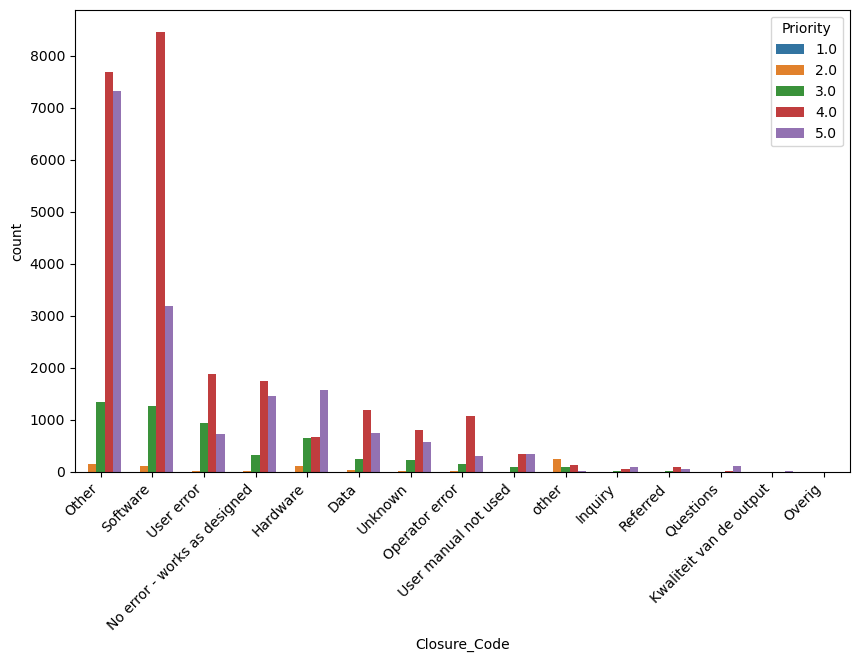

In [1026]:
plt.figure(figsize=(10,6))
sns.countplot(data=data,x="Closure_Code",hue="Priority",order=data["Closure_Code"].value_counts().index)
plt.xticks(rotation=45,ha="right")

In [1027]:

# Define a mapping dictionary
closure_code_mapping = {
    'Overig': 0,
    'Kwaliteit van de output': 1,
    'Questions': 2,
    'Referred': 3,
    'Inquiry': 4,
    'other': 5,
    'User manual not used': 6,
    'Operator error': 7,
    'Unknown': 8,
    'Data': 9,
    'Hardware': 10,
    'No error - works as designed': 11,
    'User error': 12,
    'Software': 13,
    'Other': 14
}

# Map the 'Closure_Code' column to numeric values
data['Closure_Code'] = data['Closure_Code'].map(closure_code_mapping)


In [1028]:
data.head(5)

,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
0,5,2,WBS000162,IM0000004,1,5,10.0,4.0,0.601292,2,0.0,5/2/2012 13:32,4/11/2013 13:50,4/11/2013 13:51,"3,87,16,91,111",14,1.0,1.0,2.0
1,6,2,WBS000088,IM0000005,1,3,6.0,3.0,0.415050,2,0.0,12/3/2012 15:44,2/12/2013 12:36,2/12/2013 12:36,"4,35,47,86,389",13,1.0,1.0,2.0
2,6,3,WBS000092,IM0000006,1,2,6.0,4.0,0.517551,1,3.0,29-03-2012 12:36,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",11,1.0,1.0,2.0
3,6,2,WBS000088,IM0000011,1,5,10.0,4.0,0.642927,2,0.0,17-07-2012 11:49,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",7,1.0,1.0,2.0
4,6,2,WBS000088,IM0000012,1,5,10.0,4.0,0.345258,2,2.0,10/8/2012 11:01,8/11/2013 13:55,8/11/2013 13:55,"3,38,39,03,333",14,1.0,1.0,2.0


In [1029]:
data.Category.unique()
data.Category.value_counts()

Category
2    37748
1     8846
0       11
Name: count, dtype: int64

In [1030]:
data.head(10)

,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
0,5,2,WBS000162,IM0000004,1,5,10.0,4.0,0.601292,2,0.0,5/2/2012 13:32,4/11/2013 13:50,4/11/2013 13:51,"3,87,16,91,111",14,1.0,1.0,2.0
1,6,2,WBS000088,IM0000005,1,3,6.0,3.0,0.415050,2,0.0,12/3/2012 15:44,2/12/2013 12:36,2/12/2013 12:36,"4,35,47,86,389",13,1.0,1.0,2.0
2,6,3,WBS000092,IM0000006,1,2,6.0,4.0,0.517551,1,3.0,29-03-2012 12:36,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",11,1.0,1.0,2.0
3,6,2,WBS000088,IM0000011,1,5,10.0,4.0,0.642927,2,0.0,17-07-2012 11:49,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",7,1.0,1.0,2.0
4,6,2,WBS000088,IM0000012,1,5,10.0,4.0,0.345258,2,2.0,10/8/2012 11:01,8/11/2013 13:55,8/11/2013 13:55,"3,38,39,03,333",14,1.0,1.0,2.0
5,6,2,WBS000088,IM0000013,1,5,10.0,4.0,0.006676,2,4.0,10/8/2012 11:27,8/11/2013 13:54,8/11/2013 13:54,"3,38,34,36,944",14,1.0,1.0,2.0
6,6,2,WBS000055,IM0000014,1,5,10.0,4.0,0.192907,2,2.0,15-08-2012 14:17,27-12-2013 10:59,27-12-2013 10:59,"3,70,31,91,389",8,1.0,1.0,2.0
7,6,2,WBS000088,IM0000015,1,5,10.0,4.0,0.996468,2,5.0,22-08-2012 16:31,8/11/2013 14:09,8/11/2013 14:09,"3,29,46,24,167",14,1.0,1.0,2.0
8,6,2,WBS000088,IM0000017,1,2,6.0,4.0,0.269574,2,2.0,29-08-2012 15:59,8/11/2013 14:02,8/11/2013 14:02,"0,862777778",14,1.0,1.0,2.0
9,6,2,WBS000055,IM0000018,1,5,10.0,4.0,0.306670,2,2.0,3/9/2012 16:04,8/11/2013 14:33,8/11/2013 14:35,"3,21,15,26,944",11,1.0,1.0,2.0


In [1031]:
data.Priority=data["Priority"].astype("int32")

In [1032]:
data.No_of_Related_Interactions=data["No_of_Related_Interactions"].astype("int32")

In [1033]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46605 entries, 0 to 46605
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CI_Cat                      46605 non-null  int64  
 1   CI_Subcat                   46605 non-null  int64  
 2   WBS                         46605 non-null  object 
 3   Incident_ID                 46605 non-null  object 
 4   Status                      46605 non-null  int64  
 5   Impact                      46605 non-null  int64  
 6   Urgency                     32768 non-null  float64
 7   Priority                    46605 non-null  int32  
 8   number_cnt                  46605 non-null  float64
 9   Category                    46605 non-null  int64  
 10  No_of_Reassignments         46605 non-null  float64
 11  Open_Time                   46605 non-null  object 
 12  Resolved_Time               44825 non-null  object 
 13  Close_Time                  46605 no

In [1034]:
data.head(10)

,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
0,5,2,WBS000162,IM0000004,1,5,10.0,4,0.601292,2,0.0,5/2/2012 13:32,4/11/2013 13:50,4/11/2013 13:51,"3,87,16,91,111",14,1,1.0,2.0
1,6,2,WBS000088,IM0000005,1,3,6.0,3,0.415050,2,0.0,12/3/2012 15:44,2/12/2013 12:36,2/12/2013 12:36,"4,35,47,86,389",13,1,1.0,2.0
2,6,3,WBS000092,IM0000006,1,2,6.0,4,0.517551,1,3.0,29-03-2012 12:36,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",11,1,1.0,2.0
3,6,2,WBS000088,IM0000011,1,5,10.0,4,0.642927,2,0.0,17-07-2012 11:49,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",7,1,1.0,2.0
4,6,2,WBS000088,IM0000012,1,5,10.0,4,0.345258,2,2.0,10/8/2012 11:01,8/11/2013 13:55,8/11/2013 13:55,"3,38,39,03,333",14,1,1.0,2.0
5,6,2,WBS000088,IM0000013,1,5,10.0,4,0.006676,2,4.0,10/8/2012 11:27,8/11/2013 13:54,8/11/2013 13:54,"3,38,34,36,944",14,1,1.0,2.0
6,6,2,WBS000055,IM0000014,1,5,10.0,4,0.192907,2,2.0,15-08-2012 14:17,27-12-2013 10:59,27-12-2013 10:59,"3,70,31,91,389",8,1,1.0,2.0
7,6,2,WBS000088,IM0000015,1,5,10.0,4,0.996468,2,5.0,22-08-2012 16:31,8/11/2013 14:09,8/11/2013 14:09,"3,29,46,24,167",14,1,1.0,2.0
8,6,2,WBS000088,IM0000017,1,2,6.0,4,0.269574,2,2.0,29-08-2012 15:59,8/11/2013 14:02,8/11/2013 14:02,"0,862777778",14,1,1.0,2.0
9,6,2,WBS000055,IM0000018,1,5,10.0,4,0.306670,2,2.0,3/9/2012 16:04,8/11/2013 14:33,8/11/2013 14:35,"3,21,15,26,944",11,1,1.0,2.0


In [1035]:
data.No_of_Related_Interactions.unique()
data.No_of_Related_Interactions.value_counts()

No_of_Related_Interactions
1    46605
Name: count, dtype: int64

# **Feature Selection**

In [1036]:
data1 = data.copy()

In [1037]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46605 entries, 0 to 46605
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CI_Cat                      46605 non-null  int64  
 1   CI_Subcat                   46605 non-null  int64  
 2   WBS                         46605 non-null  object 
 3   Incident_ID                 46605 non-null  object 
 4   Status                      46605 non-null  int64  
 5   Impact                      46605 non-null  int64  
 6   Urgency                     32768 non-null  float64
 7   Priority                    46605 non-null  int32  
 8   number_cnt                  46605 non-null  float64
 9   Category                    46605 non-null  int64  
 10  No_of_Reassignments         46605 non-null  float64
 11  Open_Time                   46605 non-null  object 
 12  Resolved_Time               44825 non-null  object 
 13  Close_Time                  46605 no

In [1038]:
data1.drop(["WBS", "Incident_ID","Urgency","No_of_Reassignments","No_of_Related_Incidents","No_of_Related_Changes","Open_Time","Resolved_Time","Close_Time","Handle_Time_hrs"], axis=1, inplace=True)

In [1039]:
data1.corr()

,CI_Cat,CI_Subcat,Status,Impact,Priority,number_cnt,Category,Closure_Code,No_of_Related_Interactions
CI_Cat,1.000000,-0.678739,0.021987,0.117834,0.097858,-0.003594,-0.134113,0.164085,NaN
CI_Subcat,-0.678739,1.000000,-0.024049,-0.126796,-0.083676,0.008321,0.104760,-0.117438,NaN
Status,0.021987,-0.024049,1.000000,0.021728,0.021929,-0.006368,-0.006727,0.004353,NaN
Impact,0.117834,-0.126796,0.021728,1.000000,0.234440,0.000565,0.135758,0.112630,NaN
Priority,0.097858,-0.083676,0.021929,0.234440,1.000000,-0.000608,-0.477394,0.087934,NaN
number_cnt,-0.003594,0.008321,-0.006368,0.000565,-0.000608,1.000000,-0.010539,0.001353,NaN
Category,-0.134113,0.104760,-0.006727,0.135758,-0.477394,-0.010539,1.000000,-0.055994,NaN
Closure_Code,0.164085,-0.117438,0.004353,0.112630,0.087934,0.001353,-0.055994,1.000000,NaN
No_of_Related_Interactions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


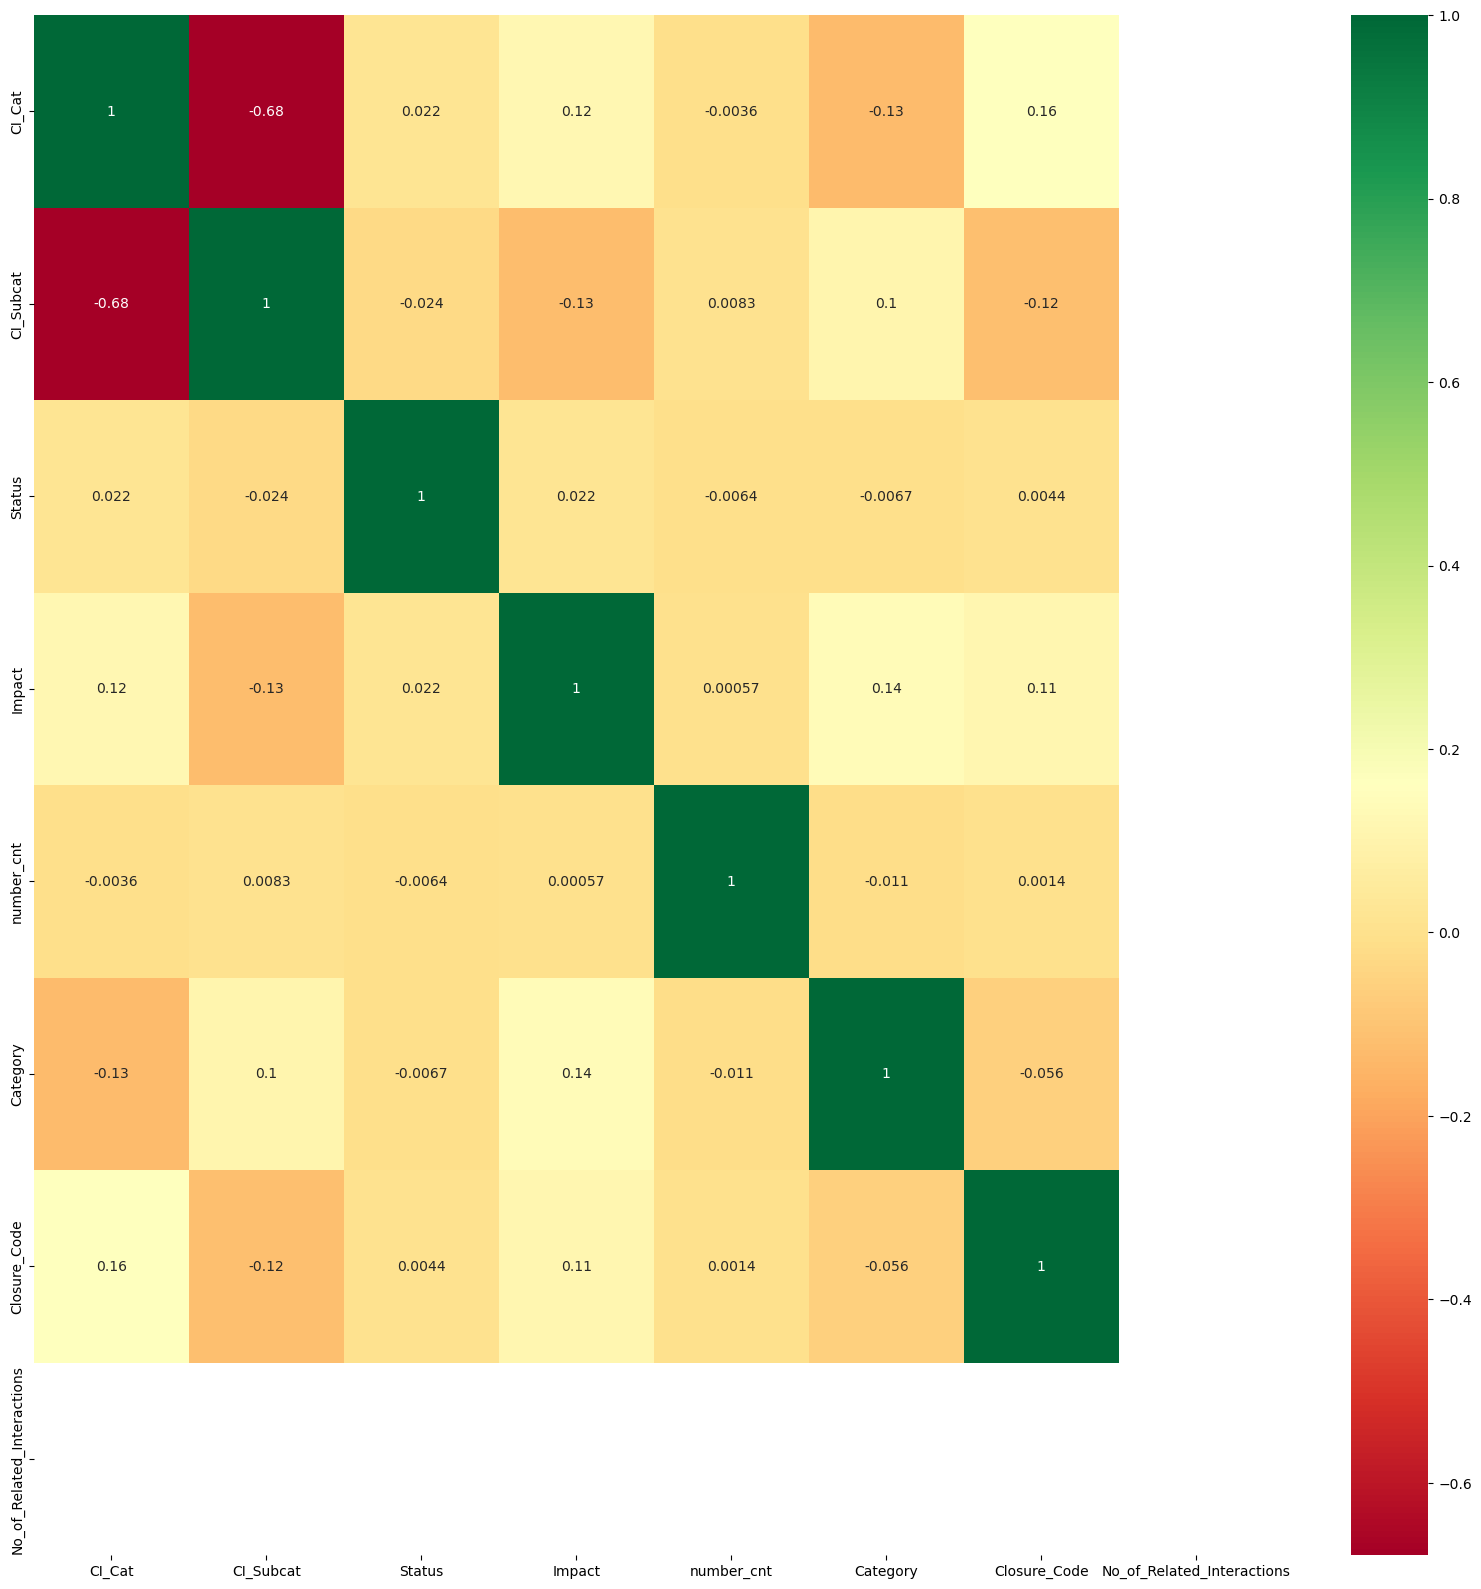

In [1040]:
#Using Pearson Correlation
plt.figure(figsize=(20,20))
cor = data1.drop("Priority",axis=1).corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.RdYlGn)
plt.show()

# We have a Small Number of Datas. So we are not Dropping such columns. It has very less Correlation with Priority.

In [1041]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [1042]:
corr_features = correlation(data1, 0.7)
len(set(corr_features))

0

In [1043]:
corr_features

set()

In [1044]:
data.head()

,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
0,5,2,WBS000162,IM0000004,1,5,10.0,4,0.601292,2,0.0,5/2/2012 13:32,4/11/2013 13:50,4/11/2013 13:51,"3,87,16,91,111",14,1,1.0,2.0
1,6,2,WBS000088,IM0000005,1,3,6.0,3,0.415050,2,0.0,12/3/2012 15:44,2/12/2013 12:36,2/12/2013 12:36,"4,35,47,86,389",13,1,1.0,2.0
2,6,3,WBS000092,IM0000006,1,2,6.0,4,0.517551,1,3.0,29-03-2012 12:36,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",11,1,1.0,2.0
3,6,2,WBS000088,IM0000011,1,5,10.0,4,0.642927,2,0.0,17-07-2012 11:49,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",7,1,1.0,2.0
4,6,2,WBS000088,IM0000012,1,5,10.0,4,0.345258,2,2.0,10/8/2012 11:01,8/11/2013 13:55,8/11/2013 13:55,"3,38,39,03,333",14,1,1.0,2.0


## **1. Predicting High Priority Tickets**

### **Feature Selection**

Only the features which are available when the tickets arrives can be used to predict priority. Therefore, we have used only 4 predictors.

####  **Split Data into x and y**

In [1045]:
X = data.loc[:,['CI_Cat','CI_Subcat','WBS','Category']]
y = data.Priority

In [1046]:
X.head()

,CI_Cat,CI_Subcat,WBS,Category
0,5,2,WBS000162,2
1,6,2,WBS000088,2
2,6,3,WBS000092,1
3,6,2,WBS000088,2
4,6,2,WBS000088,2


In [1047]:
y.sample(5)

43873    4
5925     4
20626    5
34379    4
32612    4
Name: Priority, dtype: int32

In [1048]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [1049]:
# Label Encoding
enc= LabelEncoder()
for i in (0,1,2,3):
    X.iloc[:,i] = enc.fit_transform(X.iloc[:,i])

In [1050]:
from sklearn.model_selection import train_test_split

In [1051]:
# Splitting the data into test and train for calculating accuracy
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)


In [1052]:
# Standardization technique
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [1053]:
X_train.shape

(32623, 4)

In [1054]:
X_test.shape

(13982, 4)

# Model Camparision report 

Logistic Regression
Model performance for Training set
- Accuracy: 0.6587
- Precision: 0.6016
- Recall: 0.6587
- F1 Score: 0.6030
----------------------------------
Model performance for Test set
- Accuracy: 0.6611
- Precision: 0.5983
- Recall: 0.6611
- F1 Score: 0.6050
--------------------------------------


Decision Tree Classifier
Model performance for Training set
- Accuracy: 0.8202
- Precision: 0.8237
- Recall: 0.8202
- F1 Score: 0.8198
----------------------------------
Model performance for Test set
- Accuracy: 0.8194
- Precision: 0.8223
- Recall: 0.8194
- F1 Score: 0.8183
-------------------------------------------


Random Forest Classifier
Model performance for Training set
- Accuracy: 0.8202
- Precision: 0.8232
- Recall: 0.8202
- F1 Score: 0.8196
----------------------------------
Model performance for Test set
- Accuracy: 0.8192
- Precision: 0.8217
- Recall: 0.8192
- F1 Score: 0.8179
-------------------------------------------


CatBoosting Classifier
Model performance for Training set
- Accuracy: 0.8173
- Precision: 0.8196
- Recall: 0.8173
- F1 Score: 0.8161
----------------------------------
Model performance for Test set
- Accuracy: 0.8174
- Precision: 0.8193
- Recall: 0.8174
- F1 Score: 0.8155
--------------------------------------------


AdaBoost Classifier
Model performance for Training set
- Accuracy: 0.6457
- Precision: 0.6299
- Recall: 0.6457
- F1 Score: 0.6095
----------------------------------
Model performance for Test set
- Accuracy: 0.6460
- Precision: 0.6307
- Recall: 0.6460
- F1 Score: 0.6111
----------------------------------------------


Support Vector Classifier
Model performance for Training set
- Accuracy: 0.5483
- Precision: 0.4822
- Recall: 0.5483
- F1 Score: 0.4836
----------------------------------
Model performance for Test set
- Accuracy: 0.5507
- Precision: 0.4764
- Recall: 0.5507
- F1 Score: 0.4844
----------------------------------------------


K-Nearest Neighbors
Model performance for Training set
- Accuracy: 0.7919
- Precision: 0.8020
- Recall: 0.7919
- F1 Score: 0.7946
----------------------------------
Model performance for Test set
- Accuracy: 0.7869
- Precision: 0.7971
- Recall: 0.7869
- F1 Score: 0.7895
-------------------------------------------

## **Models**

### **1.Decision Tree**

In [1055]:
# Training the model
from sklearn.tree import DecisionTreeClassifier
model_dtree=DecisionTreeClassifier()
model_dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [1056]:
# Predicting the model
y_predict_dtree = model_dtree.predict(X_test)

In [1057]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [1058]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_dtree))
print(classification_report(y_test,y_predict_dtree))

0.818838506651409
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.50      0.64      0.56       204
           3       0.65      0.62      0.64      1528
           4       0.82      0.88      0.85      7292
           5       0.88      0.80      0.84      4956

    accuracy                           0.82     13982
   macro avg       0.57      0.59      0.58     13982
weighted avg       0.82      0.82      0.82     13982



In [1059]:
confusion_matrix(y_test,y_predict_dtree)

array([[   0,    0,    0,    2,    0],
       [   0,  131,   11,   46,   16],
       [   0,   39,  952,  424,  113],
       [   0,   83,  439, 6381,  389],
       [   0,   10,   61,  900, 3985]], dtype=int64)

## **2. Random Forest**

In [1060]:
# Training the model
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(max_depth=27)
model_rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=27)

In [1061]:
# Predicting the model
y_predict_rf = model_rf.predict(X_test)

In [1062]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_rf))
print(classification_report(y_test,y_predict_rf))

0.8186239450722357
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.50      0.64      0.56       204
           3       0.65      0.61      0.63      1528
           4       0.82      0.88      0.85      7292
           5       0.88      0.81      0.84      4956

    accuracy                           0.82     13982
   macro avg       0.57      0.59      0.58     13982
weighted avg       0.82      0.82      0.82     13982



In [1063]:
confusion_matrix(y_test,y_predict_rf)

array([[   0,    0,    0,    2,    0],
       [   0,  130,   11,   47,   16],
       [   0,   39,  936,  432,  121],
       [   0,   82,  434, 6387,  389],
       [   0,   10,   59,  894, 3993]], dtype=int64)

## **2. Forecasting the Incident Volume**


**Data Preparation**



In [1064]:
# Imporing the necessary columns
df = data.loc[:,['Incident_ID','Open_Time']]

began by importing the necessary columns from your dataset, which include 'Incident_ID' and 'Open_Time'. 

In [1065]:
df.head()

,Incident_ID,Open_Time
0,IM0000004,5/2/2012 13:32
1,IM0000005,12/3/2012 15:44
2,IM0000006,29-03-2012 12:36
3,IM0000011,17-07-2012 11:49
4,IM0000012,10/8/2012 11:01


In [1066]:
import datetime as dt

In [1067]:
# Define a function to parse the date formats
def parse_date(date_str):
    try:
        # Try to parse the date using one format
        return pd.to_datetime(date_str, format='%d/%m/%Y %H:%M')
    except ValueError:
        # If the first format fails, try the second format
        return pd.to_datetime(date_str, format='%d-%m-%Y %H:%M')

# Apply the function to the 'Open_Time' column
df['Open_Time'] = df['Open_Time'].apply(parse_date)

# Convert the 'Open_Time' column to the desired string format
df['Open_Time'] = df['Open_Time'].dt.strftime('%Y-%m-%d')

# Print the modified DataFrame
df

,Incident_ID,Open_Time
0,IM0000004,2012-02-05
1,IM0000005,2012-03-12
2,IM0000006,2012-03-29
3,IM0000011,2012-07-17
4,IM0000012,2012-08-10
...,...,...
46601,IM0047053,2014-03-31
46602,IM0047054,2014-03-31
46603,IM0047055,2014-03-31
46604,IM0047056,2014-03-31


The 'Open_Time' column contained dates in different formats, so  wrote a function to parse the dates correctly. 

In [1068]:
df.head()

,Incident_ID,Open_Time
0,IM0000004,2012-02-05
1,IM0000005,2012-03-12
2,IM0000006,2012-03-29
3,IM0000011,2012-07-17
4,IM0000012,2012-08-10


**Exploratory Data Analysis**



In [1069]:
# Adding a new column which will have the number of tickets per day
df['No_Incidents'] = df.groupby('Open_Time')['Incident_ID'].transform('count')

In [1070]:
df.drop(['Incident_ID'],axis=1,inplace=True)

After converting the dates to a consistent format, you created a new DataFrame with the 'Incident_ID' column removed.

In [1071]:
df.duplicated().sum()

46274

In [1072]:
df.drop_duplicates(inplace=True)

calculated the number of incidents per day and found that there were duplicate values in the dataset. After removing duplicates, you set the 'Open_Time' as the index and checked the date range.

In [1073]:
df

,Open_Time,No_Incidents
0,2012-02-05,1
1,2012-03-12,1
2,2012-03-29,1
3,2012-07-17,1
4,2012-08-10,2
...,...,...
45857,2014-03-27,269
46154,2014-03-28,205
46354,2014-03-29,5
46386,2014-03-30,3


In [1074]:
# Setting Date as the Index
df = df.set_index('Open_Time')
df.index = pd.to_datetime(df.index)
df.index

DatetimeIndex(['2012-02-05', '2012-03-12', '2012-03-29', '2012-07-17',
               '2012-08-10', '2012-08-15', '2012-08-22', '2012-08-29',
               '2012-09-03', '2012-09-21',
               ...
               '2014-03-22', '2014-03-24', '2014-03-23', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31'],
              dtype='datetime64[ns]', name='Open_Time', length=331, freq=None)

In [1075]:
df.head()

,No_Incidents
Open_Time,
2012-02-05,1
2012-03-12,1
2012-03-29,1
2012-07-17,1
2012-08-10,2


In [1076]:
# Checking range of dates for our values
print(df.index.min(),'to',df.index.max())

2012-02-05 00:00:00 to 2014-03-31 00:00:00


In [1077]:
# Making a new Series with frequency as Day
data1 = df['No_Incidents']
data1 = data1.asfreq('D')
data1.index

DatetimeIndex(['2012-02-05', '2012-02-06', '2012-02-07', '2012-02-08',
               '2012-02-09', '2012-02-10', '2012-02-11', '2012-02-12',
               '2012-02-13', '2012-02-14',
               ...
               '2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31'],
              dtype='datetime64[ns]', name='Open_Time', length=786, freq='D')

In [1078]:
data1.head()

Open_Time
2012-02-05    1.0
2012-02-06    NaN
2012-02-07    NaN
2012-02-08    NaN
2012-02-09    NaN
Freq: D, Name: No_Incidents, dtype: float64

**Data Analysis and Visualization**

To better understand the incident volume, created a time series plot of the number of tickets per day. From the plot, we noticed that there was a significant increase in incidents after October 2013.

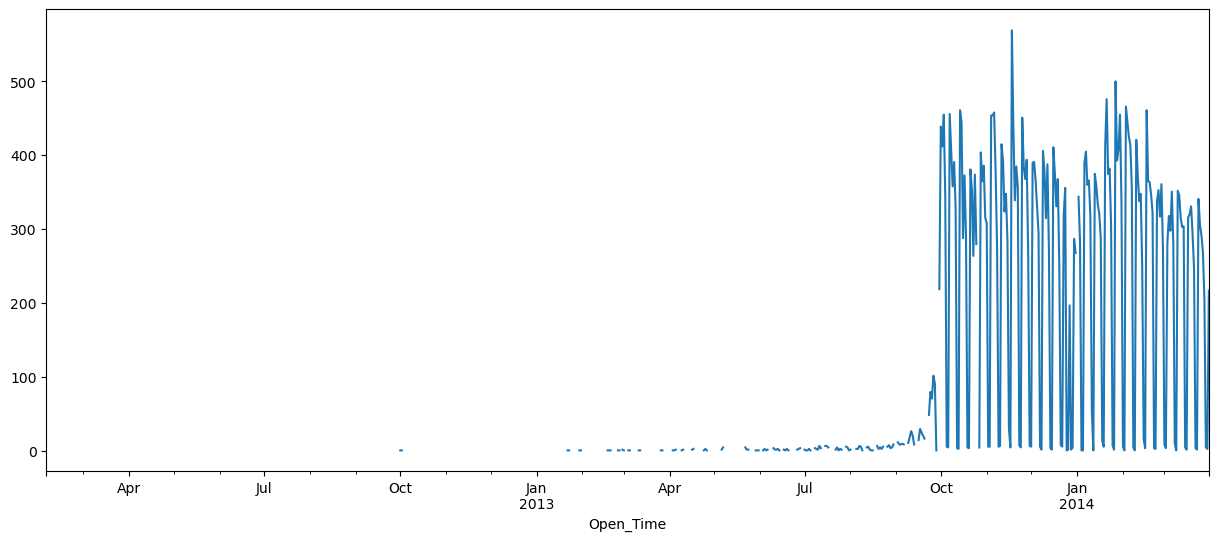

In [1079]:
# Plotting number of tickets per day
data1.plot(figsize=(15,6))
plt.show()

In [1080]:
# Since not many tickets before October 2013, we consider only the latter values
incfrom2013 = df[df.index > dt.datetime(2013,10,1)]

In [1081]:
incfrom2013.head()

,No_Incidents
Open_Time,
2013-10-02,412
2013-10-03,455
2013-10-04,345
2013-10-07,456
2013-10-05,6


In [1082]:
# new Series
data2 = incfrom2013['No_Incidents']
data2 = data2.asfreq('D')
data2.index

DatetimeIndex(['2013-10-02', '2013-10-03', '2013-10-04', '2013-10-05',
               '2013-10-06', '2013-10-07', '2013-10-08', '2013-10-09',
               '2013-10-10', '2013-10-11',
               ...
               '2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31'],
              dtype='datetime64[ns]', name='Open_Time', length=181, freq='D')

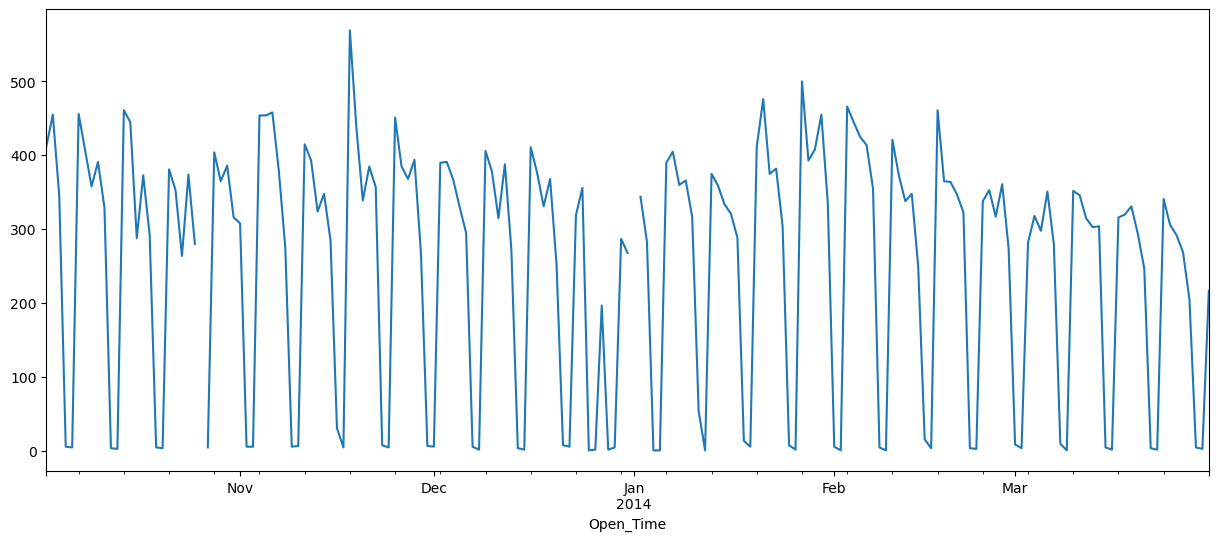

In [1083]:
# Plotting number of tickets per day after October 2013
data2.plot(figsize=(15,6))
plt.show()

**Time Series Forecasting**

In [1084]:
import itertools

In [1085]:
# Making a list of values for p,d & q
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))

In [1086]:
import statsmodels.api as sm

Choosing the ARIMA Model

In [1087]:
# Checking the AIC values per pairs
for param in pdq:
    mod = sm.tsa.statespace.SARIMAX(data2,order=param,enforce_stationarity=False,enforce_invertibility=False)
    results = mod.fit()
    print('ARIMA{} - AIC:{}'.format(param, results.aic))

ARIMA(0, 0, 0) - AIC:2539.6121269479636
ARIMA(0, 0, 1) - AIC:2373.781784431651
ARIMA(0, 1, 0) - AIC:2371.131939628779
ARIMA(0, 1, 1) - AIC:2313.1350668173545
ARIMA(1, 0, 0) - AIC:2365.2932154567616
ARIMA(1, 0, 1) - AIC:2337.3182077384618
ARIMA(1, 1, 0) - AIC:2373.130961735599
ARIMA(1, 1, 1) - AIC:2294.4318089328904


In [1088]:
# Choosing the model with minimum AIC and the ARIMA Model for Time Series Forecasting
mod = sm.tsa.statespace.SARIMAX(data2,order=(1,1,1))
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3386      0.090      3.772      0.000       0.163       0.515
ma.L1         -0.9990      0.455     -2.195      0.028      -1.891      -0.107
sigma2      2.519e+04   1.04e+04      2.419      0.016    4784.826    4.56e+04


The summary of the selected ARIMA model (1,1,1) showed the coefficients for the autoregressive (AR) and moving average (MA) terms, as well as the sigma2 value representing the variance of the residuals.

In [1089]:
# Predicting the future values and the confidence interval
pred = results.get_prediction(start=pd.to_datetime('2014-3-3'),end=pd.to_datetime('2014-10-30'),dynamic=False)
pred_ci = pred.conf_int()
pred.predicted_mean.round()

2014-03-03    172.0
2014-03-04    266.0
2014-03-05    279.0
2014-03-06    272.0
2014-03-07    291.0
              ...  
2014-10-26    252.0
2014-10-27    252.0
2014-10-28    252.0
2014-10-29    252.0
2014-10-30    252.0
Freq: D, Name: predicted_mean, Length: 242, dtype: float64

used the selected ARIMA model to predict future incident volumes. The predictions were made for the period from March 3, 2014, to October 30, 2014

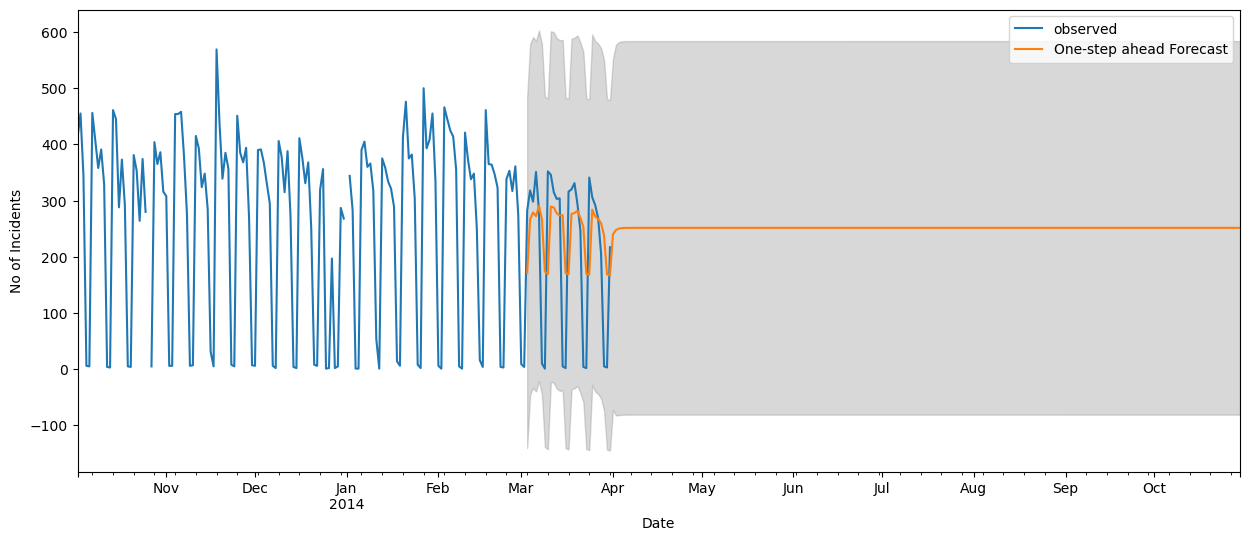

In [1090]:
ax = data2['2013':].plot(label='observed')
pred.predicted_mean.plot(ax=ax,label='One-step ahead Forecast',figsize=(15, 6))
ax.fill_between(pred_ci.index,pred_ci.iloc[:,0],pred_ci.iloc[:,1],color='grey',alpha=0.3)
ax.set_xlabel('Date')
ax.set_ylabel('No of Incidents')
plt.legend()
plt.show()

The predicted incident volumes were plotted alongside the observed data for visualization. This allowed you to assess the model's performance in forecasting incident volumes

In [1091]:
data['No_of_Related_Changes'].value_counts()

No_of_Related_Changes
2.0    46069
1.0      536
Name: count, dtype: int64

## **3. Predicting Request For Change (RFC)**

In [1092]:
# Selecting the predictors
X1 = data.loc[:,['CI_Subcat','WBS','Priority','Category','No_of_Related_Interactions','No_of_Related_Incidents']]
y1 = data.No_of_Related_Changes

In [1093]:
y1.value_counts()

No_of_Related_Changes
2.0    46069
1.0      536
Name: count, dtype: int64

In [1094]:
X1.head(2)

,CI_Subcat,WBS,Priority,Category,No_of_Related_Interactions,No_of_Related_Incidents
0,2,WBS000162,4,2,1,1.0
1,2,WBS000088,3,2,1,1.0


In [1095]:
enc= LabelEncoder()
for i in (0,1,3,4):
    X1.iloc[:,i] = enc.fit_transform(X1.iloc[:,i])

In [1096]:
# Splitting into train and test for calculating the accuracy
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=0.3,random_state=10)

In [1097]:
# Standardization technique is used
sc = StandardScaler()
X1_train = sc.fit_transform(X1_train)
X1_test = sc.transform(X1_test)

In [1098]:
X1_train.shape

(32623, 6)

In [1099]:
X1_test.shape

(13982, 6)

## **Models**

## 1. Decision Tree

In [1100]:
# Training the model
from sklearn.tree import DecisionTreeClassifier
model1_dtree=DecisionTreeClassifier()
model1_dtree.fit(X1_train,y1_train)

DecisionTreeClassifier()

In [1101]:
# Predicting the model
y1_predict_dtree = model1_dtree.predict(X1_test)

In [1102]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y1_test,y1_predict_dtree))
print(classification_report(y1_test,y1_predict_dtree))


0.9892004005149478
              precision    recall  f1-score   support

         1.0       0.27      0.03      0.05       144
         2.0       0.99      1.00      0.99     13838

    accuracy                           0.99     13982
   macro avg       0.63      0.51      0.52     13982
weighted avg       0.98      0.99      0.98     13982



In [1103]:
confusion_matrix(y1_test,y1_predict_dtree)

array([[    4,   140],
       [   11, 13827]], dtype=int64)

## 2. Random Forest

In [1104]:
# Training the model
from sklearn.ensemble import RandomForestClassifier
model1_rf = RandomForestClassifier()
model1_rf.fit(X1_train,y1_train)

RandomForestClassifier()

In [1105]:
# Predicting the model
y1_predict_rf = model1_rf.predict(X1_test)

In [1106]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y1_test,y1_predict_rf))
print(classification_report(y1_test,y1_predict_rf))

0.9893434415677299
              precision    recall  f1-score   support

         1.0       0.27      0.02      0.04       144
         2.0       0.99      1.00      0.99     13838

    accuracy                           0.99     13982
   macro avg       0.63      0.51      0.52     13982
weighted avg       0.98      0.99      0.98     13982



In [1107]:
confusion_matrix(y1_test,y1_predict_rf)

array([[    3,   141],
       [    8, 13830]], dtype=int64)